## ANA500 - Python for Data Science

### Dave Terando

### Micro-Project 4: Machine Learning Part 2

In [1]:
# Import the relevant libraries

# Core
import numpy as np 
import pandas as pd 

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, precision_recall_curve, 
                             confusion_matrix, classification_report)

### Part 1: Load and Inspect Data

In [3]:
# Load the csv files as datasets
categorical_data = pd.read_csv('data_categorical.csv')
ordinal_data = pd.read_csv('data_ordinal.csv')
numeric_data = pd.read_csv('data_numeric.csv')

#### Review Categorical Data

In [4]:
categorical_data.head()

,PERSONID,DIABETE3,_RACE,MSCODE,FLUSHOT6,EMPLOY1,SEX,MARITAL,CVDCRHD4,HLTHCVR1,...,ADDEPEV2,RENTHOM1,EXERANY2,BLIND,DECIDE,HLTHPLN1,DIABETE3.1,_STATE,ASTHMA3,MARITAL.1
0,355467,3.0,2.0,NaN,2.0,1.0,1.0,6.0,2.0,7.0,...,2.0,2.0,1.0,2.0,2.0,1.0,3.0,44.0,2.0,6.0
1,117235,3.0,1.0,5.0,1.0,7.0,2.0,3.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,3.0,19.0,2.0,3.0
2,268614,3.0,1.0,1.0,1.0,7.0,2.0,3.0,2.0,3.0,...,2.0,1.0,1.0,2.0,2.0,1.0,3.0,33.0,2.0,3.0
3,332821,3.0,4.0,NaN,2.0,1.0,1.0,1.0,2.0,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,3.0,40.0,2.0,1.0
4,348522,3.0,1.0,NaN,1.0,1.0,2.0,1.0,2.0,1.0,...,2.0,1.0,1.0,2.0,2.0,1.0,3.0,42.0,2.0,1.0


In [5]:
# Inspect structure
print("Shape:", categorical_data.shape)
categorical_data.info()

Shape: (5000, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PERSONID    5000 non-null   int64  
 1   DIABETE3    5000 non-null   float64
 2   _RACE       4997 non-null   float64
 3   MSCODE      3187 non-null   float64
 4   FLUSHOT6    4762 non-null   float64
 5   EMPLOY1     4981 non-null   float64
 6   SEX         5000 non-null   float64
 7   MARITAL     4990 non-null   float64
 8   CVDCRHD4    5000 non-null   float64
 9   HLTHCVR1    3318 non-null   float64
 10  CHCKIDNY    5000 non-null   float64
 11  USEEQUIP    4837 non-null   float64
 12  _TOTINDA    5000 non-null   float64
 13  ADDEPEV2    5000 non-null   float64
 14  RENTHOM1    4898 non-null   float64
 15  EXERANY2    5000 non-null   float64
 16  BLIND       4830 non-null   float64
 17  DECIDE      4829 non-null   float64
 18  HLTHPLN1    5000 non-null   float64
 19  DIABETE3.

In [6]:
# Iterate through variables to view categories and category counts noting any 7/77/777 and 9/99/9999
print("\nFrequency of each category:")
print(categorical_data['DIABETE3'].value_counts())


Frequency of each category:
3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: DIABETE3, dtype: int64


In [7]:
# Iterate through variables to view categories and category counts
print("\nFrequency of each category:")
print(categorical_data['DIABETE3.1'].value_counts())


Frequency of each category:
3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: DIABETE3.1, dtype: int64


#### Review Ordinal Data

In [7]:
ordinal_data.head()

,PERSONID,DIABETE3,GENHLTH,_AGEG5YR,_BMI5CAT,CHECKUP1,INCOME2,_EDUCAG,SLEPTIM1,MENTHLTH,_SMOKER3
0,355467,3.0,1.0,6.0,3.0,3.0,3.0,3.0,6.0,88.0,4.0
1,117235,3.0,1.0,10.0,3.0,1.0,4.0,2.0,7.0,88.0,4.0
2,268614,3.0,2.0,12.0,2.0,1.0,3.0,2.0,8.0,2.0,4.0
3,332821,3.0,2.0,3.0,2.0,1.0,8.0,4.0,6.0,15.0,3.0
4,348522,3.0,2.0,9.0,2.0,2.0,8.0,3.0,7.0,88.0,4.0


In [8]:
# Inspect structure
print("Shape:", ordinal_data.shape)
ordinal_data.info()

Shape: (5000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   GENHLTH   5000 non-null   float64
 3   _AGEG5YR  5000 non-null   float64
 4   _BMI5CAT  4681 non-null   float64
 5   CHECKUP1  5000 non-null   float64
 6   INCOME2   4962 non-null   float64
 7   _EDUCAG   5000 non-null   float64
 8   SLEPTIM1  5000 non-null   float64
 9   MENTHLTH  5000 non-null   float64
 10  _SMOKER3  5000 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 429.8 KB


In [12]:
# Iterate through variables to view categories and category counts noting any 7/77/777 and 9/99/9999
print("\nFrequency of each category:")
print(ordinal_data['_BMI5CAT'].value_counts())


Frequency of each category:
3.0    1652
2.0    1543
4.0    1400
1.0      86
Name: _BMI5CAT, dtype: int64


#### Review Numeric Data

In [17]:
numeric_data.head()

,PERSONID,DIABETE3,NUMADULT,CHILDREN,WEIGHT2,DRVISITS
0,355467,3.0,NaN,2.0,180.0,6.0
1,117235,3.0,1.0,88.0,160.0,2.0
2,268614,3.0,1.0,88.0,120.0,2.0
3,332821,3.0,NaN,88.0,160.0,NaN
4,348522,3.0,NaN,88.0,129.0,1.0


In [10]:
# Inspect structure
print("Shape:", numeric_data.shape)
numeric_data.info()

Shape: (5000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   NUMADULT  3240 non-null   float64
 3   CHILDREN  4988 non-null   float64
 4   WEIGHT2   4950 non-null   float64
 5   DRVISITS  3567 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 234.5 KB


In [11]:
# Iterate through variables to view categories and category counts noting any 7/77/777 and 9/99/9999
print("\nFrequency of each category:")
print(numeric_data['WEIGHT2'].value_counts().head(30))


Frequency of each category:
200.0     238
160.0     222
150.0     209
180.0     196
170.0     187
190.0     180
140.0     154
9999.0    153
130.0     136
220.0     135
165.0     133
175.0     133
135.0     120
210.0     111
185.0     106
145.0     105
155.0      98
195.0      85
125.0      85
230.0      81
120.0      79
250.0      65
7777.0     62
240.0      61
205.0      58
225.0      49
215.0      46
110.0      43
115.0      43
138.0      41
Name: WEIGHT2, dtype: int64


After reviewing all variables DIABETE3 and DIABETE3.1 as well as MARITAL and MARITAL.1 appear to be redundant variables.

### Merge datasets and remove duplicate variables 

In [3]:
# Merge the datasets sequentially
# First, merge categorical with ordinal
merged_df = pd.merge(categorical_data, ordinal_data, on='PERSONID', how='outer')

# Then, merge with numeric
final_merged_df = pd.merge(merged_df, numeric_data, on='PERSONID', how='outer')

# Drop redundant columns from final_merged_df
BFRSS2014_df = final_merged_df.drop(columns=['DIABETE3_x', 'DIABETE3_y', 'DIABETE3.1', 'MARITAL.1'])

# Inspect structure
print("Shape:", BFRSS2014_df.shape)
BFRSS2014_df.info()

Shape: (5000, 34)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   _RACE     4997 non-null   float64
 2   MSCODE    3187 non-null   float64
 3   FLUSHOT6  4762 non-null   float64
 4   EMPLOY1   4981 non-null   float64
 5   SEX       5000 non-null   float64
 6   MARITAL   4990 non-null   float64
 7   CVDCRHD4  5000 non-null   float64
 8   HLTHCVR1  3318 non-null   float64
 9   CHCKIDNY  5000 non-null   float64
 10  USEEQUIP  4837 non-null   float64
 11  _TOTINDA  5000 non-null   float64
 12  ADDEPEV2  5000 non-null   float64
 13  RENTHOM1  4898 non-null   float64
 14  EXERANY2  5000 non-null   float64
 15  BLIND     4830 non-null   float64
 16  DECIDE    4829 non-null   float64
 17  HLTHPLN1  5000 non-null   float64
 18  _STATE    5000 non-null   float64
 19  ASTHMA3   5000 non-null   float64
 20  GENHLTH   50

### Part 2: Clean the Data

#### Convert weight in Kg to weight in lbs for WEIGHT2

In [4]:
# copy BFRSS2014_df to df to avoid modifying origional dataframe until ready
df = BFRSS2014_df.copy()

# Define the conversion function for WEIGHT2
def convert_weight2(weight):
    if pd.isna(weight):
        return np.nan  # Preserve NaN for future imputation
    weight = float(weight)
    if 9000 <= weight <= 9998:  # Kilograms
        kg = weight - 9000
        return round(kg * 2.20462)  # Convert to pounds and round to nearest integer
    elif 50 <= weight <= 999:  # Already in pounds
        return weight
    else:  # Invalid values (e.g., 7777, 9999)
        return np.nan

# Apply the conversion to WEIGHT2
df['WEIGHT2'] = df['WEIGHT2'].apply(convert_weight2)

# Update the original DataFrame
BFRSS2014_df = df

# Verify the results
print("Missing values in WEIGHT2 after conversion:")
print(BFRSS2014_df['WEIGHT2'].isna().sum())
print("\nWEIGHT2 summary statistics:")
print(BFRSS2014_df['WEIGHT2'].describe())
print("\nSample of WEIGHT2 values:")
print(BFRSS2014_df['WEIGHT2'].head(10))

Missing values in WEIGHT2 after conversion:
265

WEIGHT2 summary statistics:
count    4735.000000
mean      177.054065
std        44.549020
min        75.000000
25%       145.000000
50%       170.000000
75%       200.000000
max       580.000000
Name: WEIGHT2, dtype: float64

Sample of WEIGHT2 values:
0    180.0
1    160.0
2    120.0
3    160.0
4    129.0
5    130.0
6    255.0
7    131.0
8    142.0
9    140.0
Name: WEIGHT2, dtype: float64


In [6]:
BFRSS2014_df['WEIGHT2'].value_counts()

200.0    238
160.0    222
150.0    209
180.0    196
170.0    187
        ... 
388.0      1
287.0      1
291.0      1
369.0      1
84.0       1
Name: WEIGHT2, Length: 223, dtype: int64

#### View Histogram of WEIGHT2 before and after conversion.

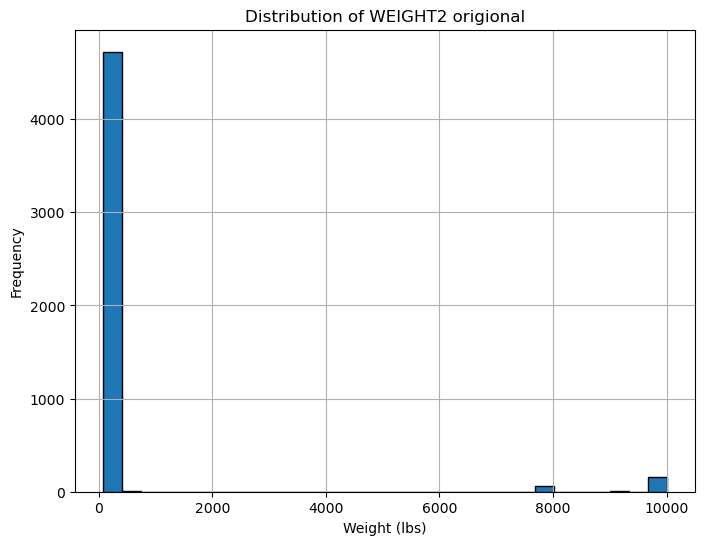

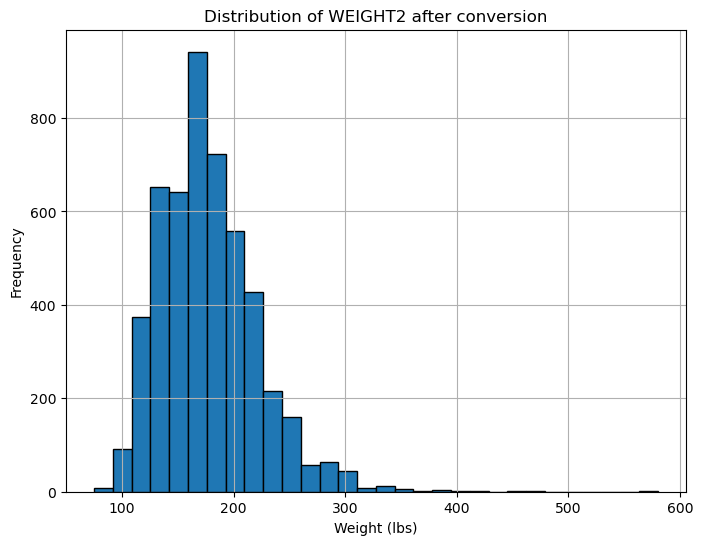

In [22]:
import matplotlib.pyplot as plt

# Histogram for WEIGHT2
plt.figure(figsize=(8, 6))
numeric_data['WEIGHT2'].hist(bins=30, edgecolor='black')
plt.title('Distribution of WEIGHT2 origional')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

# Histogram for WEIGHT2 after concrsion
plt.figure(figsize=(8, 6))
BFRSS2014_df['WEIGHT2'].hist(bins=30, edgecolor='black')
plt.title('Distribution of WEIGHT2 after conversion')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

#### Impute missing values  
"dont know" = 7/77/7777 and "refused to respond" = 9/99/9999 will be considered missing values as well.

In [7]:
# Check missing values
BFRSS2014_df.isna().sum().sort_values(ascending=False).head(20)

MSCODE      1813
NUMADULT    1760
HLTHCVR1    1682
DRVISITS    1433
_BMI5CAT     319
WEIGHT2      265
FLUSHOT6     238
DECIDE       171
BLIND        170
USEEQUIP     163
RENTHOM1     102
INCOME2       38
EMPLOY1       19
CHILDREN      12
MARITAL       10
_RACE          3
SLEPTIM1       0
_EDUCAG        0
DIABETE3       0
MENTHLTH       0
dtype: int64

#### Use mode imputation for categorical/binary variables with low missing value rates.

In [5]:
# impute missing values using most frequent values (mode) for select variables

# copy BFRSS2014_df to df to avoid modifying origional dataframe until ready
df = BFRSS2014_df.copy()

# Define variables and their codes to impute as NaN
impute_codes = {
    'EMPLOY1': [9],
    'MARITAL': [9],
    '_RACE': [9],
    'CHILDREN': [99],
    'CVDCRHD4': [7, 9],
    'CHCKIDNY': [7, 9],
    '_TOTINDA': [9],
    'ADDEPEV2': [7, 9],
    'EXERANY2': [7, 9],
    'HLTHPLN1': [7, 9],
    '_STATE': [66, 72],
    'ASTHMA3': [7, 9],
    'DIABETE3': [7, 9],
    'RENTHOM1': [7, 9]
}

# Step 1: Convert specified codes to NaN
for var, codes in impute_codes.items():
    df[var] = df[var].replace(codes, np.nan)

# Step 2: Apply mode imputation for each variable
for var in impute_codes.keys():
    mode_value = df[var].mode()[0]  # Get the most frequent value
    df[var] = df[var].fillna(mode_value)
    print(f"Imputed {var} with mode: {mode_value}")

# Update the original DataFrame
BFRSS2014_df = df

# Verify results
print("\nMissing values after imputation:")
print(BFRSS2014_df[list(impute_codes.keys())].isna().sum())

Imputed EMPLOY1 with mode: 1.0
Imputed MARITAL with mode: 1.0
Imputed _RACE with mode: 1.0
Imputed CHILDREN with mode: 88.0
Imputed CVDCRHD4 with mode: 2.0
Imputed CHCKIDNY with mode: 2.0
Imputed _TOTINDA with mode: 1.0
Imputed ADDEPEV2 with mode: 2.0
Imputed EXERANY2 with mode: 1.0
Imputed HLTHPLN1 with mode: 1.0
Imputed _STATE with mode: 31.0
Imputed ASTHMA3 with mode: 2.0
Imputed DIABETE3 with mode: 3.0
Imputed RENTHOM1 with mode: 1.0

Missing values after imputation:
EMPLOY1     0
MARITAL     0
_RACE       0
CHILDREN    0
CVDCRHD4    0
CHCKIDNY    0
_TOTINDA    0
ADDEPEV2    0
EXERANY2    0
HLTHPLN1    0
_STATE      0
ASTHMA3     0
DIABETE3    0
RENTHOM1    0
dtype: int64


#### Use median imputation for ordinal or count-like variables.

In [6]:
# impute missing values using middle values (median) for select variables

# copy BFRSS2014_df to df to avoid modifying origional dataframe until ready
df = BFRSS2014_df.copy()

# Define variables and their codes to impute as NaN
impute_codes = {
    'INCOME2': [77, 99],
    'GENHLTH': [7, 9],
    '_AGEG5YR': [14],
    '_EDUCAG': [9],
    'CHECKUP1': [7, 9],
    'SLEPTIM1': [77, 99],
    'MENTHLTH': [77, 99]
}

# Step 1: Handle special case for MENTHLTH (recode 88 to 0, as it means "none")
df['MENTHLTH'] = df['MENTHLTH'].replace(88, 0)

# Step 2: Convert specified codes to NaN
for var, codes in impute_codes.items():
    df[var] = df[var].replace(codes, np.nan)

# Step 3: Apply median imputation for each variable
for var in impute_codes.keys():
    median_value = df[var].median()
    df[var] = df[var].fillna(median_value)
    print(f"Imputed {var} with median: {median_value}")

# Update the original DataFrame
BFRSS2014_df = df

# Verify results
print("\nMissing values after imputation:")
print(BFRSS2014_df[list(impute_codes.keys())].isna().sum())

Imputed INCOME2 with median: 6.0
Imputed GENHLTH with median: 2.0
Imputed _AGEG5YR with median: 8.0
Imputed _EDUCAG with median: 3.0
Imputed CHECKUP1 with median: 1.0
Imputed SLEPTIM1 with median: 7.0
Imputed MENTHLTH with median: 0.0

Missing values after imputation:
INCOME2     0
GENHLTH     0
_AGEG5YR    0
_EDUCAG     0
CHECKUP1    0
SLEPTIM1    0
MENTHLTH    0
dtype: int64


#### Use KNN imputation for high missing value rates.

In [7]:
from sklearn.impute import KNNImputer

# copy BFRSS2014_df to df to avoid modifying origional dataframe until ready
df = BFRSS2014_df.copy()

# Define variables and their codes to impute as NaN
impute_codes = {
    'HLTHCVR1': [77, 99],
    'FLUSHOT6': [7, 9],
    'DECIDE': [7, 9],
    'BLIND': [7, 9],
    'USEEQUIP': [7, 9],
    'DRVISITS': [77],
    'WEIGHT2': [7777, 9999],  # Already converted, but ensure any remaining codes are NaN
    'MSCODE': [],  # No codes to impute
    'NUMADULT': [],  # No codes to impute
    '_BMI5CAT': []  # No codes to impute
}

# Define valid categories for mapping post-imputation
valid_categories = {
    'MSCODE': [1, 2, 3, 5],
    'HLTHCVR1': [1, 2, 3, 4, 5, 6, 7, 8],
    'FLUSHOT6': [1, 2],
    'DECIDE': [1, 2],
    'BLIND': [1, 2],
    'USEEQUIP': [1, 2],
    '_BMI5CAT': [1, 2, 3, 4],
    'NUMADULT': [1, 2, 3, 4, 5, 6, 7]  # Treat as categorical for mapping
}

# Handle special case for DRVISITS (recode 88 to 0, as it means "none")
df['DRVISITS'] = df['DRVISITS'].replace(88, 0)

# Step 2: Convert specified codes to NaN
for var, codes in impute_codes.items():
    if codes:  # Only replace if there are codes to impute
        df[var] = df[var].replace(codes, np.nan)

# KNN imputation using all numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df[numerical_cols]), 
                          columns=numerical_cols, 
                          index=df.index)

# Map categorical variables to valid categories
for var, categories in valid_categories.items():
    df[var] = df_imputed[var].apply(lambda x: min(categories, key=lambda v: abs(v - x)))

# Assign imputed continuous variables (WEIGHT2, DRVISITS) directly
df['WEIGHT2'] = df_imputed['WEIGHT2']
df['DRVISITS'] = df_imputed['DRVISITS']

# Update the original DataFrame
BFRSS2014_df = df

# Verify results
print("Missing values after imputation:")
print(BFRSS2014_df[list(impute_codes.keys())].isna().sum())

Missing values after imputation:
HLTHCVR1    0
FLUSHOT6    0
DECIDE      0
BLIND       0
USEEQUIP    0
DRVISITS    0
WEIGHT2     0
MSCODE      0
NUMADULT    0
_BMI5CAT    0
dtype: int64


In [8]:
# Re-check missing values
BFRSS2014_df.isna().sum().sort_values(ascending=False).head(20)

PERSONID    0
_EDUCAG     0
ASTHMA3     0
GENHLTH     0
_AGEG5YR    0
_BMI5CAT    0
CHECKUP1    0
INCOME2     0
SLEPTIM1    0
_RACE       0
MENTHLTH    0
_SMOKER3    0
DIABETE3    0
NUMADULT    0
CHILDREN    0
WEIGHT2     0
_STATE      0
HLTHPLN1    0
DECIDE      0
BLIND       0
dtype: int64

#### Recode target variable DIABETE3 to binary variable


DIABETE3 distribution:
1.0     627
2.0      39
3.0    4258
4.0      76
Name: DIABETE3, dtype: int64


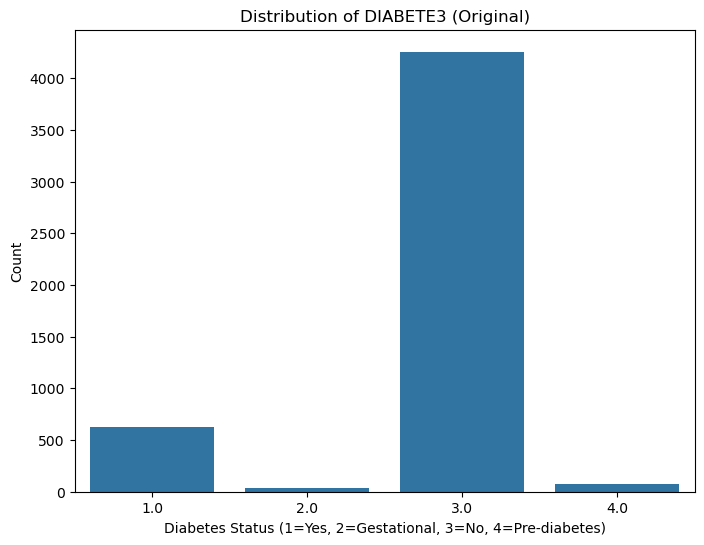


DIABETE3_binary distribution after recoding:
0    4297
1     703
Name: DIABETE3_binary, dtype: int64


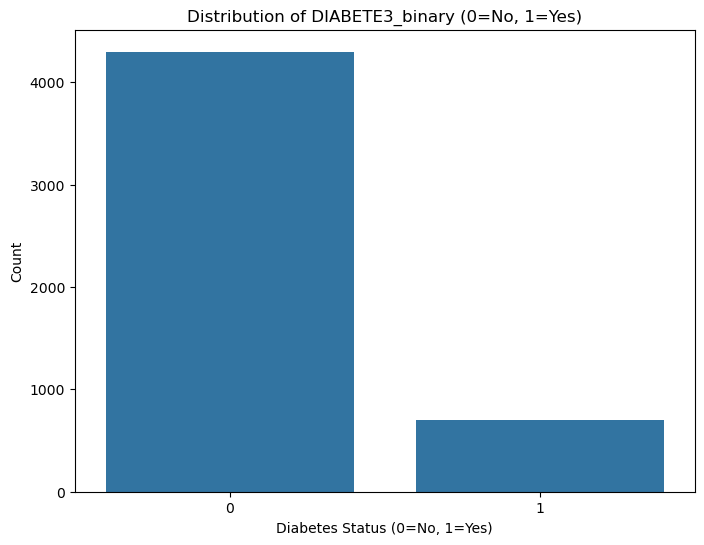

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# copy BFRSS2014_df to df to avoid modifying origional dataframe until ready
df = BFRSS2014_df.copy()

# Recode DIABETE3 to binary: 1, 4 = Yes (1), 2, 3 = No (0)
df['DIABETE3_binary'] = df['DIABETE3'].apply(lambda x: 1 if x in [1, 4] else 0)

# Update the original DataFrame
BFRSS2014_df = df

# Distribution after recoding
print("\nDIABETE3 distribution:")
binary_counts = BFRSS2014_df['DIABETE3'].value_counts().sort_index()
print(binary_counts)

# Visualization: Bar plot for DIABETE3 (original)
plt.figure(figsize=(8, 6))
sns.countplot(x='DIABETE3', data=BFRSS2014_df), #order=[1, 2, 3, 4])
plt.title('Distribution of DIABETE3 (Original)')
plt.xlabel('Diabetes Status (1=Yes, 2=Gestational, 3=No, 4=Pre-diabetes)')
plt.ylabel('Count')
plt.show()

# Verify distribution after recoding
print("\nDIABETE3_binary distribution after recoding:")
binary_counts = BFRSS2014_df['DIABETE3_binary'].value_counts().sort_index()
print(binary_counts)

# Visualization: Bar plot for DIABETE3_binary
plt.figure(figsize=(8, 6))
sns.countplot(x='DIABETE3_binary', data=BFRSS2014_df, order=[0, 1])
plt.title('Distribution of DIABETE3_binary (0=No, 1=Yes)')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

In [11]:
# Check for 35th variable (DIABETE3_binary) in BFRSS2014_df
BFRSS2014_df.shape

(5000, 35)

#### Check continuous variables (WEIGHT2, DRVISITS) for outliers.

# <span style="color: red;">★</span> 
#### Update for Module 2 with boxplots added 


WEIGHT2 summary statistics:
count    5000.000000
mean      177.189240
std        43.656164
min        75.000000
25%       145.000000
50%       170.000000
75%       200.000000
max       580.000000
Name: WEIGHT2, dtype: float64


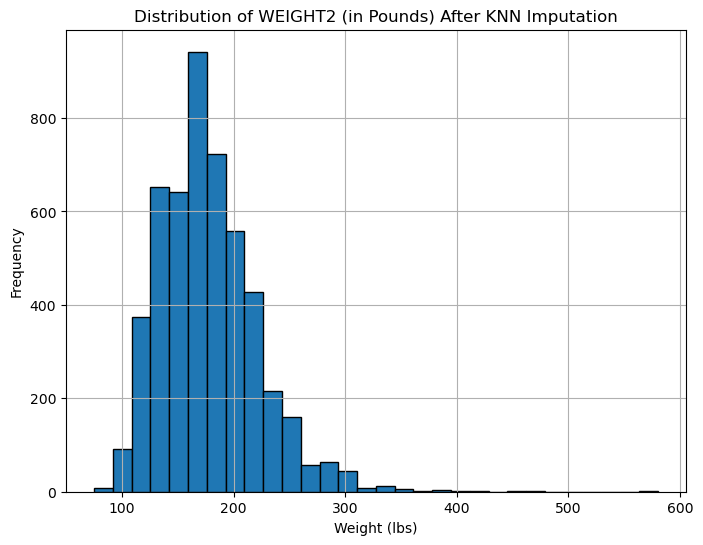

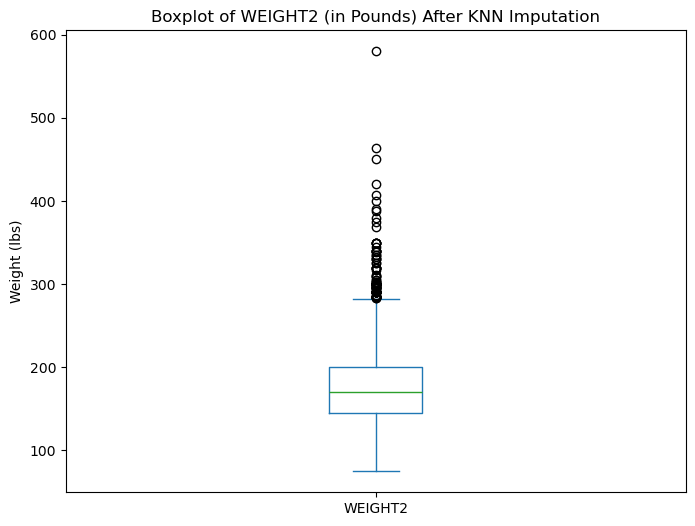


DRVISITS summary statistics:
count    5000.000000
mean        5.437320
std         7.682001
min         0.000000
25%         2.000000
50%         4.000000
75%         6.200000
max        99.000000
Name: DRVISITS, dtype: float64


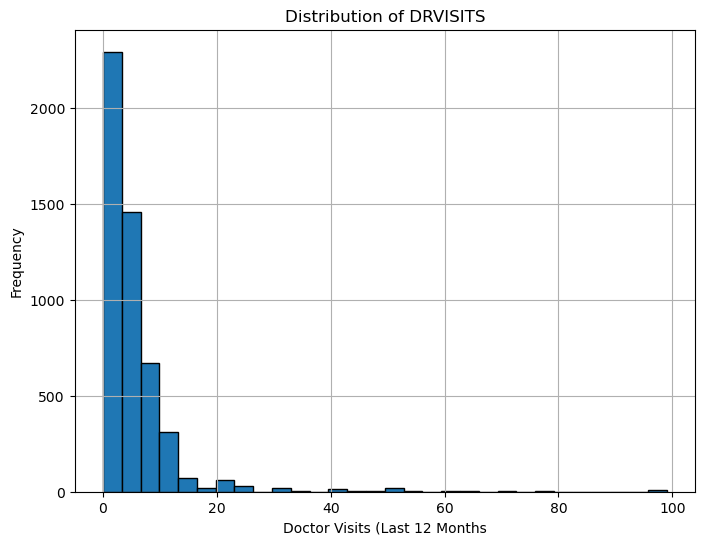

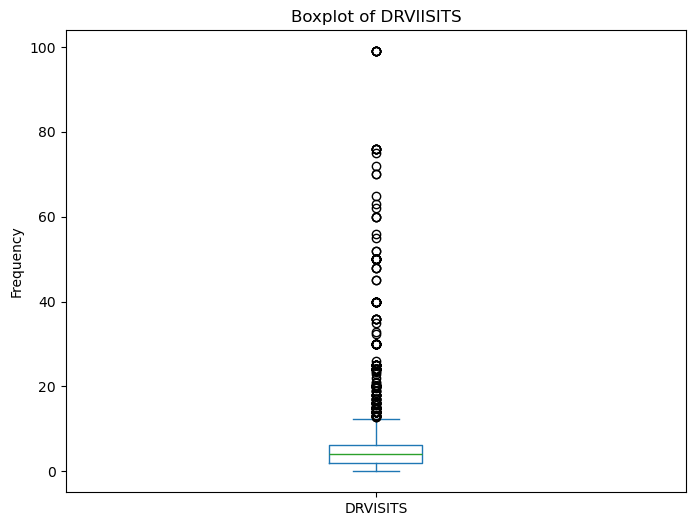

In [12]:
# WEIGHT@ Summart Statistics
print("\nWEIGHT2 summary statistics:")
print(BFRSS2014_df['WEIGHT2'].describe())

# Histogram for WEIGHT2
plt.figure(figsize=(8, 6))
BFRSS2014_df['WEIGHT2'].hist(bins=30, edgecolor='black')
plt.title('Distribution of WEIGHT2 (in Pounds) After KNN Imputation')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()


# Boxplot for WEIGHT2
plt.figure(figsize=(8, 6))
BFRSS2014_df['WEIGHT2'].plot.box()
plt.title('Boxplot of WEIGHT2 (in Pounds) After KNN Imputation')
plt.ylabel('Weight (lbs)')
plt.xlabel('')  # Clear the default x-axis label from Pandas
plt.show()


# DRVISITS Summary Statistics
print("\nDRVISITS summary statistics:")
print(BFRSS2014_df['DRVISITS'].describe())

# Histogram for DRVISITS
plt.figure(figsize=(8, 6))
BFRSS2014_df['DRVISITS'].hist(bins=30, edgecolor='black')
plt.title('Distribution of DRVISITS')
plt.xlabel('Doctor Visits (Last 12 Months')
plt.ylabel('Frequency')
plt.show()

# Boxplot for DRVISITS
plt.figure(figsize=(8, 6))
BFRSS2014_df['DRVISITS'].plot.box()
plt.title('Boxplot of DRVIISITS')
plt.ylabel('Frequency')
plt.xlabel('')  # Clear the default x-axis label from Pandas
plt.show()

#### Apply the Interquartile Range (IQR) method to detect and handle outliers

In [10]:
q1, q3 = BFRSS2014_df["WEIGHT2"].quantile([0.25, 0.75])
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
BFRSS2014_df["WEIGHT2_capped"] = BFRSS2014_df["WEIGHT2"].clip(lower=low, upper=high)
BFRSS2014_df[["WEIGHT2","WEIGHT2_capped"]].describe()

,WEIGHT2,WEIGHT2_capped
count,5000.000000,5000.000000
mean,177.189240,176.410540
std,43.656164,40.914845
min,75.000000,75.000000
25%,145.000000,145.000000
50%,170.000000,170.000000
75%,200.000000,200.000000
max,580.000000,282.500000


In [11]:
q1, q3 = BFRSS2014_df["DRVISITS"].quantile([0.25, 0.75])
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
BFRSS2014_df["DRVISITS_capped"] = BFRSS2014_df["DRVISITS"].clip(lower=low, upper=high)
BFRSS2014_df[["DRVISITS","DRVISITS_capped"]].describe()

,DRVISITS,DRVISITS_capped
count,5000.000000,5000.000000
mean,5.437320,4.551900
std,7.682001,3.439237
min,0.000000,0.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,6.200000,6.200000
max,99.000000,12.500000


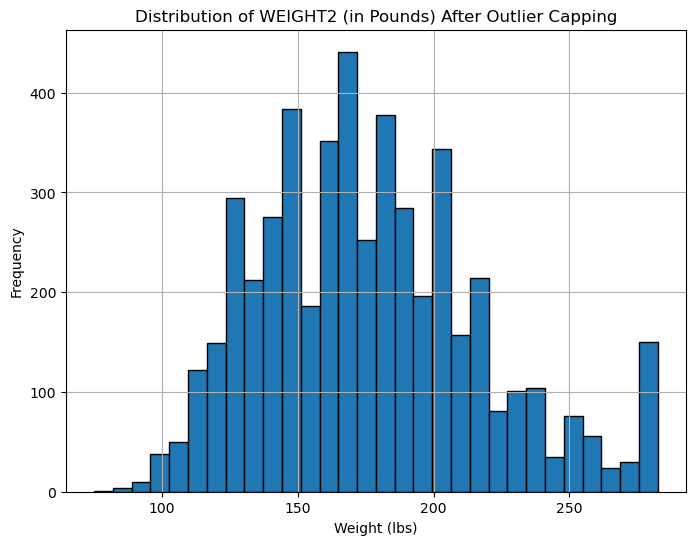

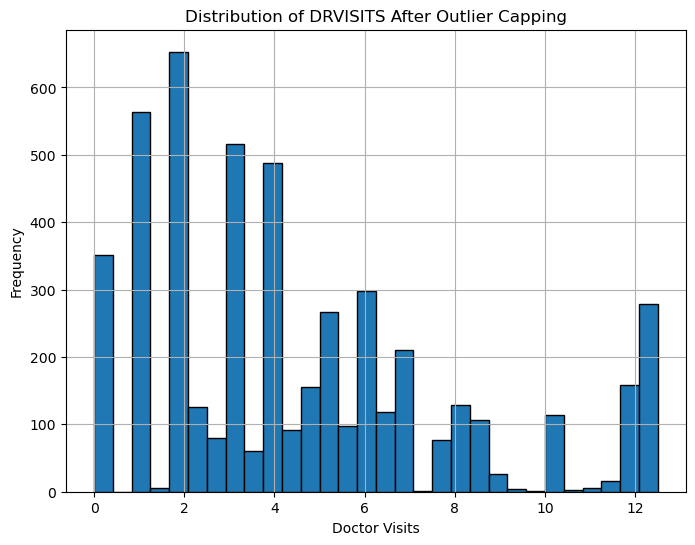

In [15]:
# Histogram for WEIGHT2 after outlier capping
plt.figure(figsize=(8, 6))
BFRSS2014_df['WEIGHT2_capped'].hist(bins=30, edgecolor='black')
plt.title('Distribution of WEIGHT2 (in Pounds) After Outlier Capping')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

# Histogram for DRVISITS after outlier capping
plt.figure(figsize=(8, 6))
BFRSS2014_df['DRVISITS_capped'].hist(bins=30, edgecolor='black')
plt.title('Distribution of DRVISITS After Outlier Capping')
plt.xlabel('Doctor Visits')
plt.ylabel('Frequency')
plt.show()

# <span style="color: red;">★</span> Begin Module 2

In [14]:
# Save BFRSS2014_df as configured after Module 1 for easy reload after kernel restart.
BFRSS2014_df.to_csv('my_data.csv', index=False) # index=False prevents pandas from writing the index as a column

# After a kernel restart, reload the dataframe
BFRSS2014_df = pd.read_csv('my_data.csv')


In [12]:
# Check shape of DF
BFRSS2014_df.shape

(5000, 37)

In [16]:
# Count the number of duplicate rows (I forgot to do this in part 1)
num_duplicates = BFRSS2014_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### Correlation heatmap for numerical variables

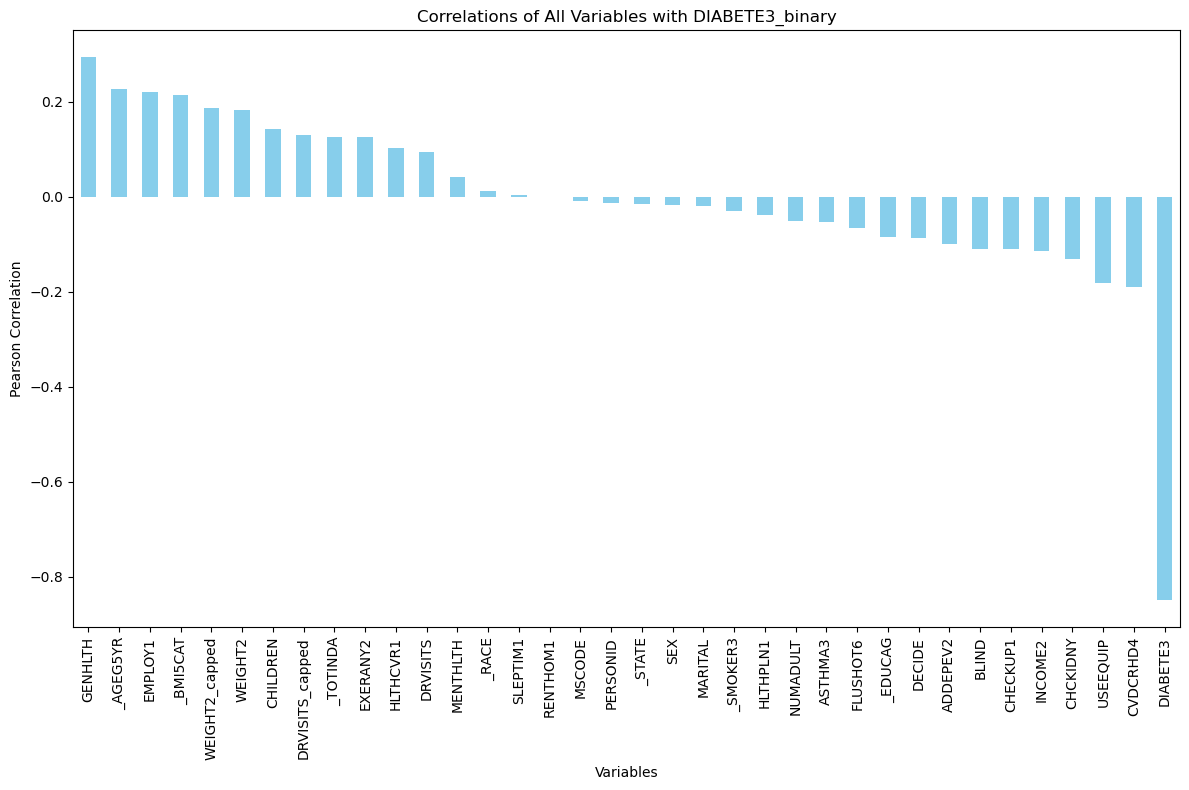

In [91]:
# Bar Chart of Correlations with Target variable DIABETE#_binary (Used for quick insights)
df = BFRSS2014_df.copy()

# Select all numerical columns 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute full correlation matrix
corr_full = df[numerical_cols].corr(method='pearson')

# Compute correlations with DIABETE3_binary
target_corrs = corr_full['DIABETE3_binary'].drop('DIABETE3_binary').sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 8))
target_corrs.plot(kind='bar', color='skyblue')
plt.title('Correlations of All Variables with DIABETE3_binary')
plt.xlabel('Variables')
plt.ylabel('Pearson Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

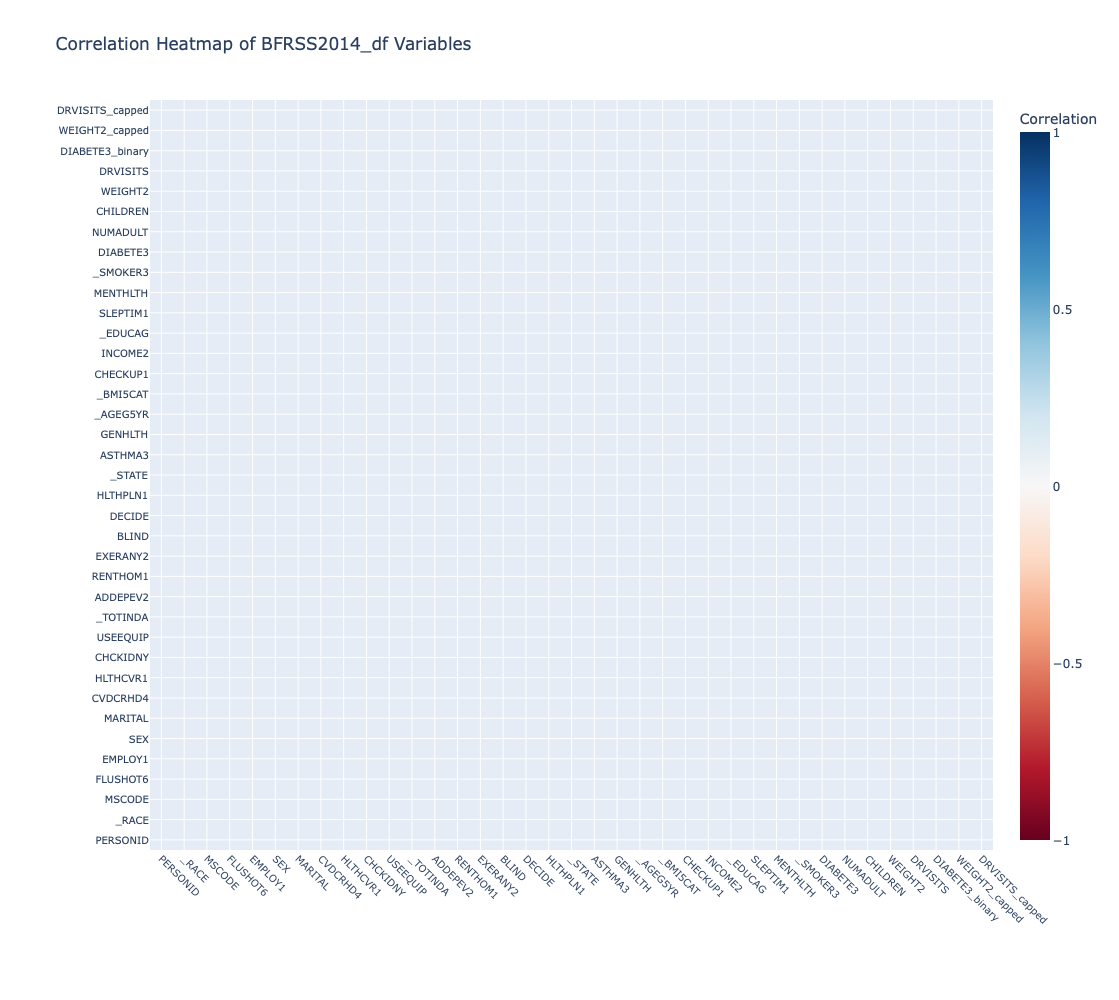

In [92]:
import plotly.graph_objects as go

# Compute the correlation matrix for numerical columns
corr_matrix = BFRSS2014_df.corr(numeric_only=True)

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,  # Correlation values
    x=corr_matrix.columns,  # Column names for x-axis
    y=corr_matrix.columns,  # Column names for y-axis
    colorscale='RdBu',  # Coolwarm-like color scale (red to blue)
    zmin=-1, zmax=1,  # Correlation values range from -1 to 1
#    text=corr_matrix.values,  # Values to display on hover
#    texttemplate='%{text:.2f}',  # Format hover text to 2 decimal places
    hoverinfo='x+y+z',  # Show x, y labels and correlation value on hover
    colorbar=dict(title='Correlation')  # Colorbar title
))

# Update layout for better readability
fig.update_layout(
    title='Correlation Heatmap of BFRSS2014_df Variables',
    xaxis=dict(tickangle=45, tickfont=dict(size=10)),  # Rotate x-axis labels
    yaxis=dict(tickfont=dict(size=10)),  # Adjust y-axis font size
    width=1000,  # Adjust width for variables
    height=1000,  # Adjust height for variables
    margin=dict(l=150, r=50, t=100, b=150)  # Adjust margins for labels
)

# Show the plot
fig.show()

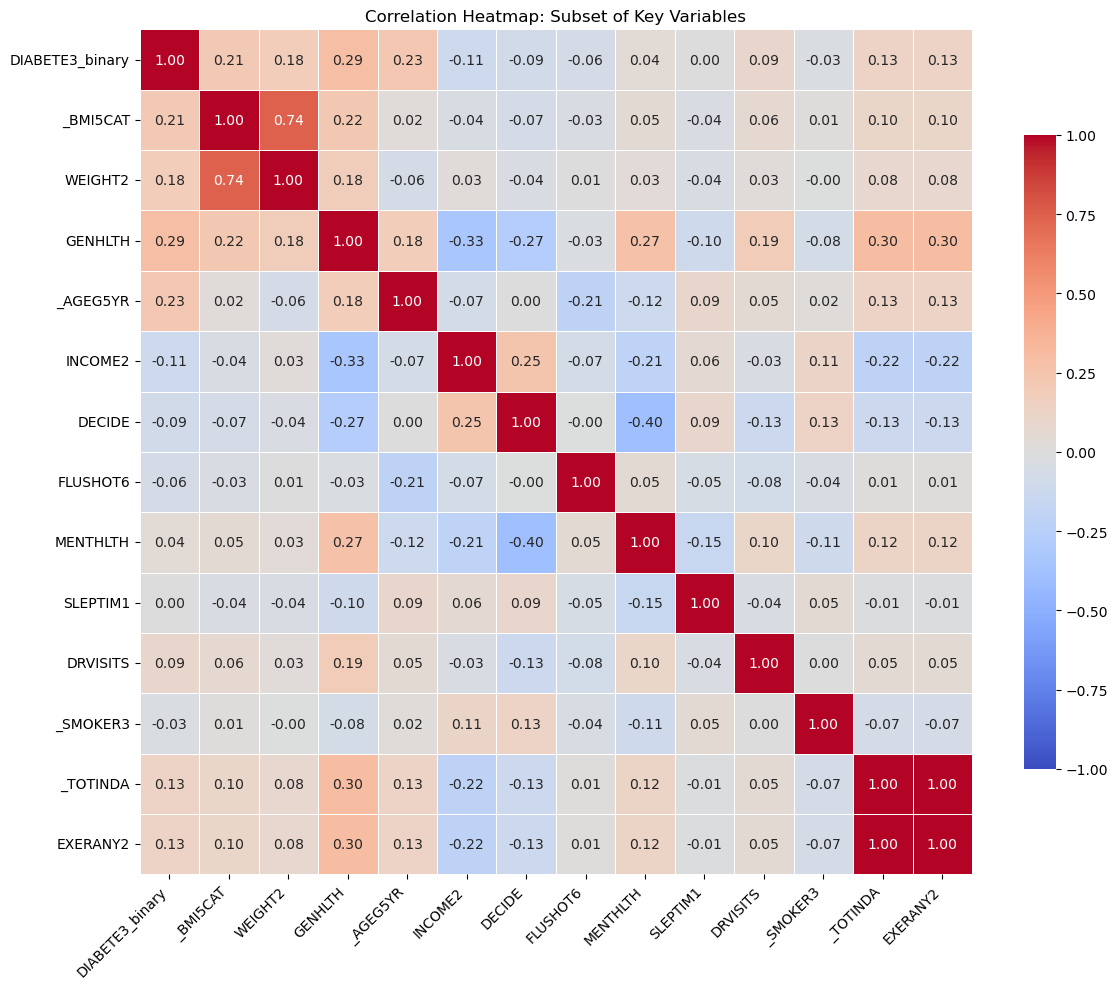

In [89]:
# Subset Heatmap (Select relevant variables for readability) and iterate through remaining variables

df = BFRSS2014_df.copy()

# Step 1: Select all numerical columns (exclude non-numeric if any, but all should be int64/float64)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Curated subset: Focus on key predictors + target
subset_cols = ['DIABETE3_binary', '_BMI5CAT', 'WEIGHT2', 'GENHLTH', '_AGEG5YR', 'INCOME2', 'DECIDE', 
               'FLUSHOT6', 'MENTHLTH', 'SLEPTIM1', 'DRVISITS', '_SMOKER3', '_TOTINDA', 'EXERANY2']

# Compute correlation matrix for subset
corr_subset = df[subset_cols].corr(method='pearson')  # Or 'spearman' for ordinal data

# Plot subset heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, cbar_kws={'shrink': 0.75})
plt.title('Correlation Heatmap: Subset of Key Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Explore and Evaluate Feature Variables


1.0     180
2.0    4820
Name: CHCKIDNY, dtype: int64


<Axes: xlabel='CHCKIDNY', ylabel='count'>

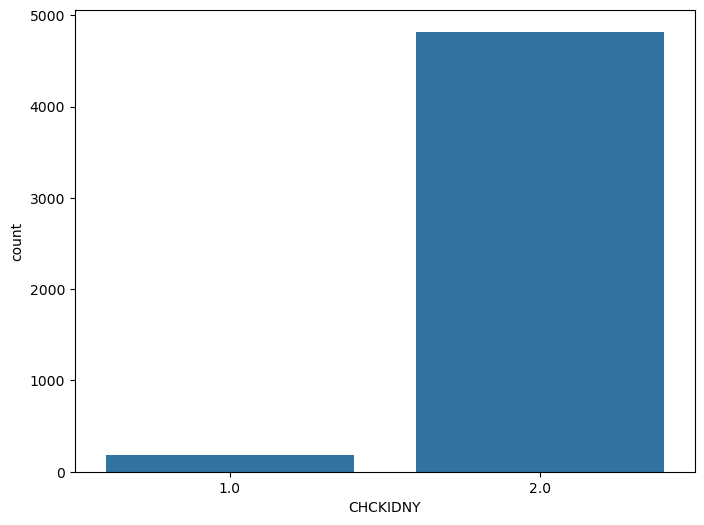

In [301]:
# use this code to iterate through potential feature variable for review and assesment
print(BFRSS2014_df['CHCKIDNY'].value_counts().sort_index())

# Visualization: Bar plot for variable
plt.figure(figsize=(8, 6))
sns.countplot(x='CHCKIDNY', data=BFRSS2014_df)

#### Review and Recode variables as needed


Variable distribution:
1.0    2054
2.0    2946
Name: SEX, dtype: int64


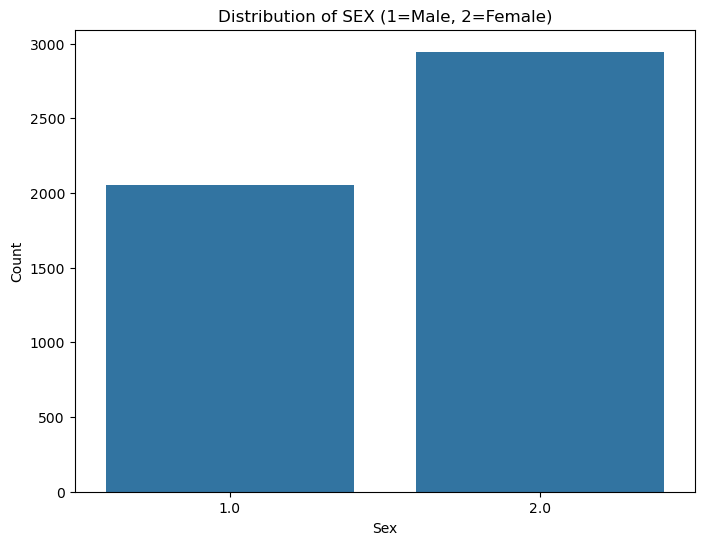

In [303]:
# Review the SEX variable
print("\nVariable distribution:")
SEX_counts=BFRSS2014_df['SEX'].value_counts().sort_index()
print(SEX_counts)

# Visualization: Bar plot for Sex distribution 
plt.figure(figsize=(8, 6))
sns.countplot(x='SEX', data=BFRSS2014_df)
plt.title('Distribution of SEX (1=Male, 2=Female)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### Recode Selected Variables

# <span style="color: red;">★</span> 
#### Update GENHLTH for Module 3 with reduced Categories


Variable distribution:
1.0     899
2.0    1650
3.0    1512
4.0     687
5.0     252
Name: GENHLTH, dtype: int64


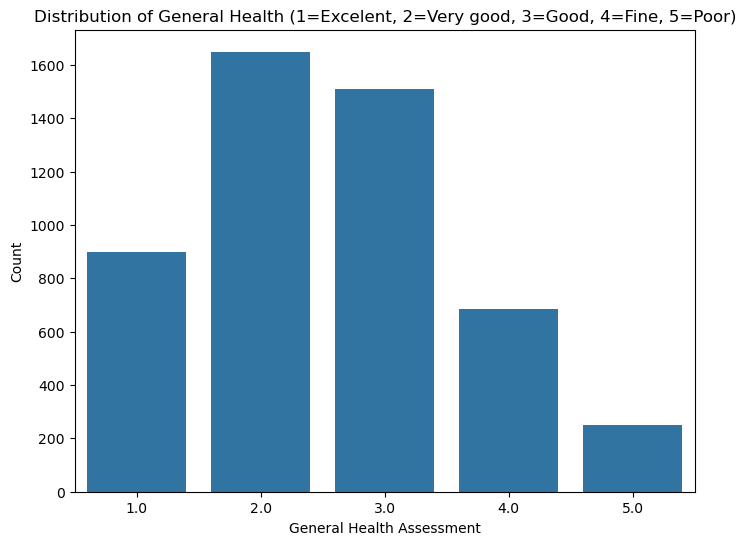

In [13]:
# Review the GENHLTH variable
print("\nVariable distribution:")
genhlth_counts=BFRSS2014_df['GENHLTH'].value_counts().sort_index()
print(genhlth_counts)

# Visualization: Bar plot for Sex distribution 
plt.figure(figsize=(8, 6))
sns.countplot(x='GENHLTH', data=BFRSS2014_df)
plt.title('Distribution of General Health (1=Excelent, 2=Very good, 3=Good, 4=Fine, 5=Poor)')
plt.xlabel('General Health Assessment')
plt.ylabel('Count')
plt.show()

Original genral health distribution:
1.0     899
2.0    1650
3.0    1512
4.0     687
5.0     252
Name: GENHLTH, dtype: int64

Recoded general health distribution:
1.0    2549
2.0    1512
3.0     939
Name: GENHLTH_recoded, dtype: int64


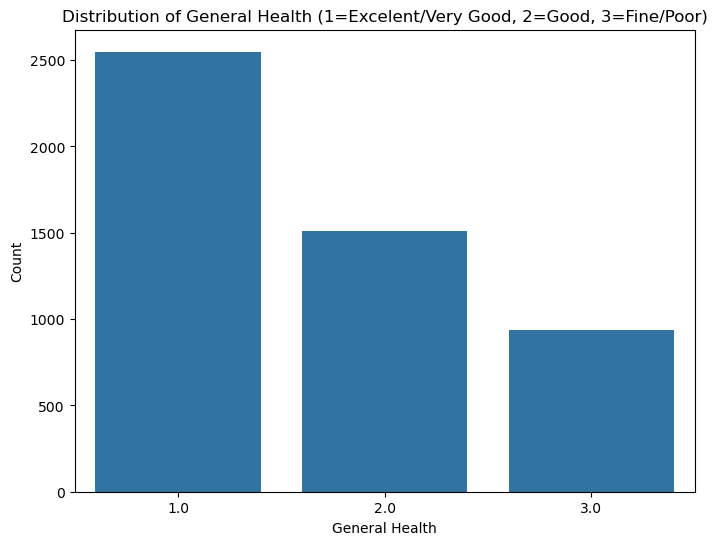

In [26]:
# Recode GENHLTGH for better ballance and fewer categories 

# Print original value counts for comparison
print("Original genral health distribution:")
print(BFRSS2014_df['GENHLTH'].value_counts().sort_index())

# Create a dictionary to map the old values to the new ones
genhlth_recoded = {
    1:1, 2:1,
    3: 2,
    4: 3, 5: 3,  # Grouping categories 1, 2, and 3 into new category 1
 
}

# Apply the recoding to the DataFrame and store it in a new column
BFRSS2014_df['GENHLTH_recoded'] = BFRSS2014_df['GENHLTH'].replace(genhlth_recoded)

# Print the new value counts to verify the recoding
print("\nRecoded general health distribution:")
print(BFRSS2014_df['GENHLTH_recoded'].value_counts().sort_index())

# Visualization: Bar plot for INCOME_recoded 
plt.figure(figsize=(8, 6))
sns.countplot(x='GENHLTH_recoded', data=BFRSS2014_df)
plt.title('Distribution of General Health (1=Excelent/Very Good, 2=Good, 3=Fine/Poor)')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.show()

#### INCOME2


Variable distribution:
1.0     211
2.0     265
3.0     331
4.0     393
5.0     473
6.0    1416
7.0     645
8.0    1266
Name: INCOME2, dtype: int64


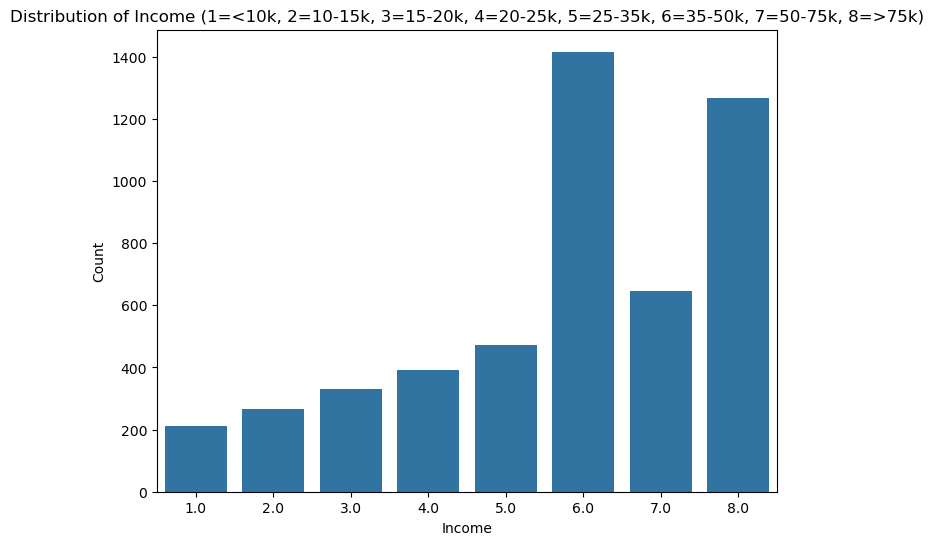

In [306]:
# Review the INCOME2 variable
print("\nVariable distribution:")
income_counts=BFRSS2014_df['INCOME2'].value_counts().sort_index()
print(income_counts)

# Visualization: Bar plot for INCOME2 
plt.figure(figsize=(8, 6))
sns.countplot(x='INCOME2', data=BFRSS2014_df)
plt.title('Distribution of Income (1=<10k, 2=10-15k, 3=15-20k, 4=20-25k, 5=25-35k, 6=35-50k, 7=50-75k, 8=>75k)')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

Original income distribution:
1.0     211
2.0     265
3.0     331
4.0     393
5.0     473
6.0    1416
7.0     645
8.0    1266
Name: INCOME2, dtype: int64

Recoded income distribution:
1.0     807
2.0     866
3.0    1416
4.0     645
5.0    1266
Name: INCOME_recoded, dtype: int64


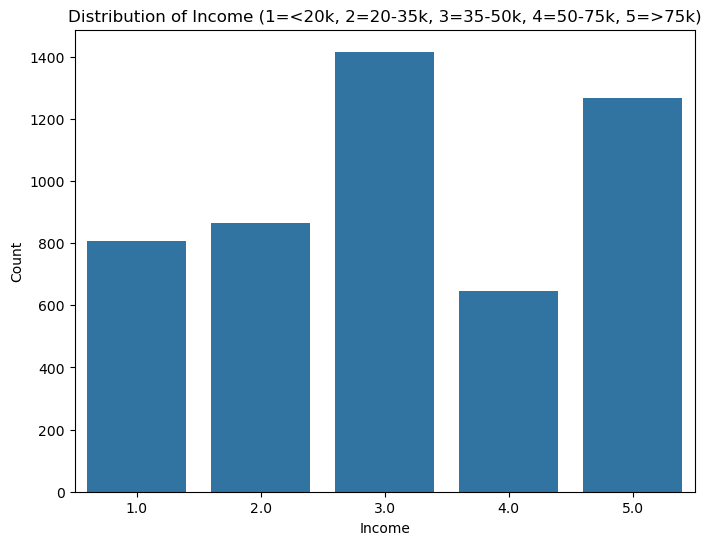

In [14]:
# Recode INCOME2 for better ballance

# Print original value counts for comparison
print("Original income distribution:")
print(BFRSS2014_df['INCOME2'].value_counts().sort_index())

# Create a dictionary to map the old values to the new ones
income_recode = {
    1: 1, 2: 1, 3: 1,  # Grouping categories 1, 2, and 3 into new category 1
    4: 2, 5: 2,  # Grouping categories 4 and 5 into new category 2
    6: 3,  # Category 6 becomes new category 3
    7: 4,  # Category 7 becomes new category 4
    8: 5   # Category 8 becomes new category 5
}

# Apply the recoding to the DataFrame and store it in a new column
BFRSS2014_df['INCOME_recoded'] = BFRSS2014_df['INCOME2'].replace(income_recode)

# Print the new value counts to verify the recoding
print("\nRecoded income distribution:")
print(BFRSS2014_df['INCOME_recoded'].value_counts().sort_index())

# Visualization: Bar plot for INCOME_recoded 
plt.figure(figsize=(8, 6))
sns.countplot(x='INCOME_recoded', data=BFRSS2014_df)
plt.title('Distribution of Income (1=<20k, 2=20-35k, 3=35-50k, 4=50-75k, 5=>75k)')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

#### _AGEG5YR


Variable distribution:
1.0     272
2.0     227
3.0     238
4.0     262
5.0     296
6.0     354
7.0     462
8.0     581
9.0     547
10.0    581
11.0    431
12.0    312
13.0    437
Name: _AGEG5YR, dtype: int64


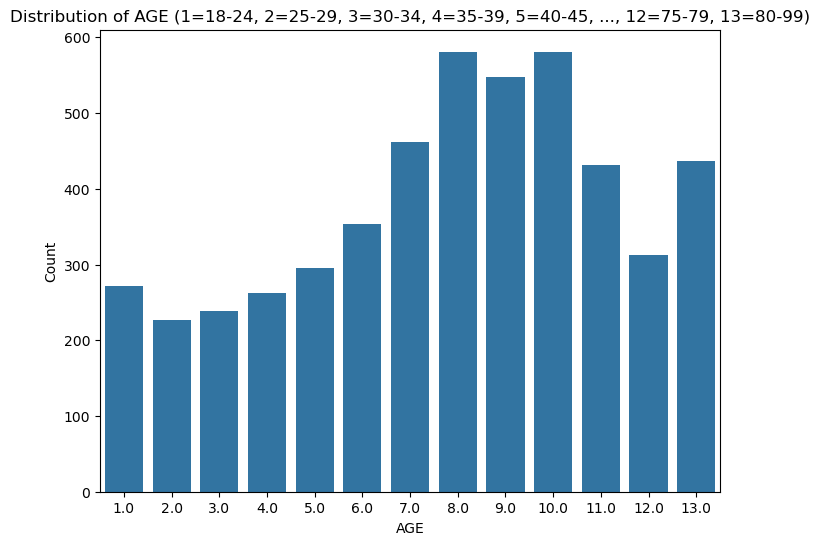

In [197]:
# Review the _AGEG5YR variable
print("\nVariable distribution:")
AGEG5YR_counts=BFRSS2014_df['_AGEG5YR'].value_counts().sort_index()
print(AGEG5YR_counts)

# Visualization: Bar plot for Sex distribution 
plt.figure(figsize=(8, 6))
sns.countplot(x='_AGEG5YR', data=BFRSS2014_df)
plt.title('Distribution of AGE (1=18-24, 2=25-29, 3=30-34, 4=35-39, 5=40-45, ..., 12=75-79, 13=80-99)')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

Original income distribution:
1.0     272
2.0     227
3.0     238
4.0     262
5.0     296
6.0     354
7.0     462
8.0     581
9.0     547
10.0    581
11.0    431
12.0    312
13.0    437
Name: _AGEG5YR, dtype: int64

Recoded income distribution:
1.0     737
2.0     912
3.0    1590
4.0    1761
Name: AGE_recoded, dtype: int64


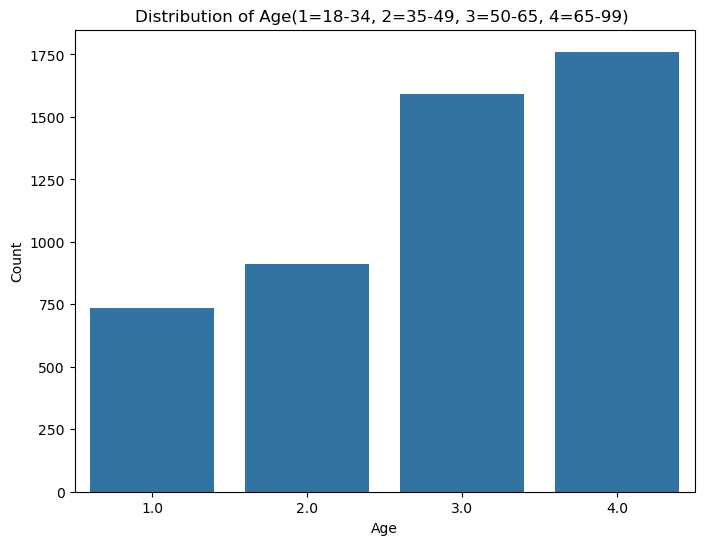

In [15]:
# Recode _AGEG5YR for better ballance and fewer categories 

# Print original value counts for comparison
print("Original income distribution:")
print(BFRSS2014_df['_AGEG5YR'].value_counts().sort_index())

# Create a dictionary to map the old values to the new ones
age_recode = {
    1: 1, 2: 1, 3: 1,  # Grouping categories 1, 2, and 3 into new category 1
    4: 2, 5: 2, 6: 2,  # Grouping categories 4, 5, and 6 into new category 2
    7: 3, 8: 3, 9: 3,  # Grouping categories 7, 8, and 9 into new category 3
    10: 4, 11: 4, 12: 4, 13: 4 # Grouping categories 10, 11, 12 and 13 into new category 4
}

# Apply the recoding to the DataFrame and store it in a new column
BFRSS2014_df['AGE_recoded'] = BFRSS2014_df['_AGEG5YR'].replace(age_recode)

# Print the new value counts to verify the recoding
print("\nRecoded income distribution:")
print(BFRSS2014_df['AGE_recoded'].value_counts().sort_index())

# Visualization: Bar plot for INCOME_recoded 
plt.figure(figsize=(8, 6))
sns.countplot(x='AGE_recoded', data=BFRSS2014_df)
plt.title('Distribution of Age(1=18-34, 2=35-49, 3=50-65, 4=65-99) ')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### _BMI5CAT


Variable distribution:
1      86
2    1581
3    1904
4    1429
Name: _BMI5CAT, dtype: int64


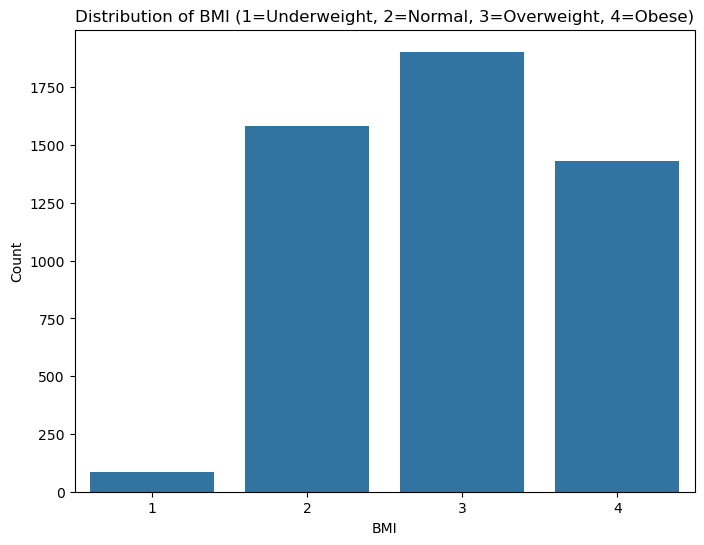

In [16]:
# Review the _BMI5CAT variable
print("\nVariable distribution:")
_BMI5CAT_counts=BFRSS2014_df['_BMI5CAT'].value_counts().sort_index()
print(_BMI5CAT_counts)

# Visualization: Bar plot for BMI distribution 
plt.figure(figsize=(8, 6))
sns.countplot(x='_BMI5CAT', data=BFRSS2014_df)
plt.title('Distribution of BMI (1=Underweight, 2=Normal, 3=Overweight, 4=Obese)')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

Original income distribution:
1      86
2    1581
3    1904
4    1429
Name: _BMI5CAT, dtype: int64

Recoded income distribution:
1    1667
2    1904
3    1429
Name: BMI_recoded, dtype: int64


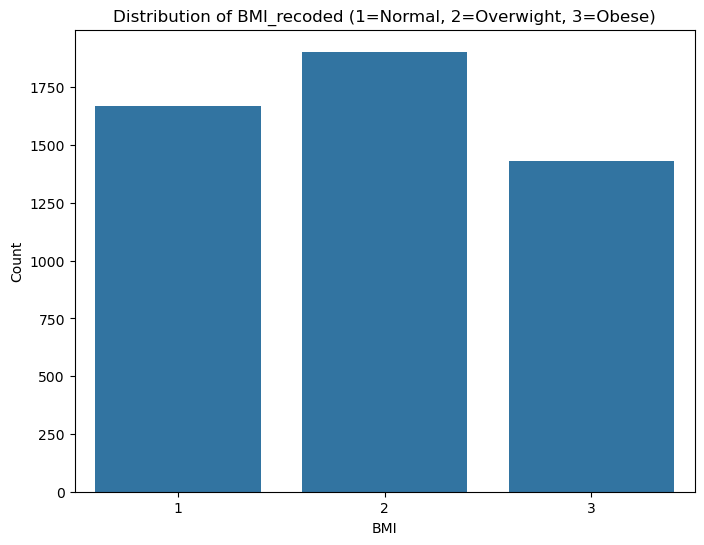

In [17]:
# Recode _BMI5CAT for better ballance (Combining underweight with normal)

# Print original value counts for comparison
print("Original income distribution:")
print(BFRSS2014_df['_BMI5CAT'].value_counts().sort_index())

# Create a dictionary to map the old values to the new ones
bmi_recode = {
    1: 1, 2: 1,  # Grouping categories 1 and 2 into new category 1
    3: 2,   # Category 3 becomes new category 2
    4: 3,  # Category 4 becomes new category 3
   
}

# Apply the recoding to the DataFrame and store it in a new column
BFRSS2014_df['BMI_recoded'] = BFRSS2014_df['_BMI5CAT'].replace(bmi_recode)

# Print the new value counts to verify the recoding
print("\nRecoded income distribution:")
print(BFRSS2014_df['BMI_recoded'].value_counts().sort_index())

# Visualization: Bar plot for INCOME_recoded 
plt.figure(figsize=(8, 6))
sns.countplot(x='BMI_recoded', data=BFRSS2014_df)
plt.title('Distribution of BMI_recoded (1=Normal, 2=Overwight, 3=Obese)')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

#### DRVISITS_capped


DRVISITS_capped:
0.0     351
1.0     562
1.2       2
1.6       5
1.8      45
2.0     608
2.2     119
2.4       7
2.6       9
2.8      71
3.0     505
3.2      11
3.4       5
3.6      55
3.8       9
4.0     479
4.2      54
4.4      37
4.6      54
4.8     101
5.0     251
5.2       5
5.4      10
5.6      36
5.8      62
6.0     263
6.2      35
6.4       2
6.6     116
6.8     107
7.0     104
7.2       1
7.6       2
7.8      75
8.0     128
8.4      35
8.6      71
8.8       6
9.0      21
9.2       2
9.4       2
9.8       1
10.0    113
10.4      1
10.8      3
11.0      5
11.6     16
11.8     37
12.0    122
12.4      4
12.5    275
Name: DRVISITS_capped, dtype: int64

DRVISITS count after recoding:
0     351
1     614
2     814
3     585
4     725
5     364
6     523
7     182
8     240
9      26
10    117
11     58
12    401
Name: DRVISITS_recoded, dtype: int64


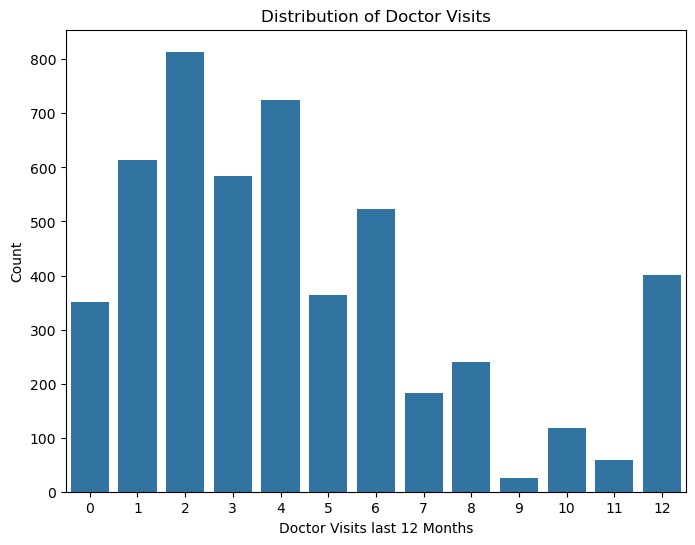

In [18]:
# Recode DRVISITS_capped to whole numbers

# Create a new column with rounded whole numbers
BFRSS2014_df['DRVISITS_recoded'] = BFRSS2014_df['DRVISITS_capped'].astype(int)

print("\nDRVISITS_capped:")
print(BFRSS2014_df['DRVISITS_capped'].value_counts().sort_index())


print("\nDRVISITS count after recoding:")
print(BFRSS2014_df['DRVISITS_recoded'].value_counts().sort_index())

# Visualization: Bar plot for DRVISITS_recoded 
plt.figure(figsize=(8, 6))
sns.countplot(x='DRVISITS_recoded', data=BFRSS2014_df)
plt.title('Distribution of Doctor Visits')
plt.xlabel('Doctor Visits last 12 Months')
plt.ylabel('Count')
plt.show()

# <span style="color: red;">★</span> 
#### Update DRVISITS for Module 3 with reduced Categories

Original DRVISITS distribution:
0     351
1     614
2     814
3     585
4     725
5     364
6     523
7     182
8     240
9      26
10    117
11     58
12    401
Name: DRVISITS_recoded, dtype: int64

Recoded Doctor Visits distribution:
1    1779
2    1674
3     945
4     602
Name: DRVISITS_recoded_2, dtype: int64


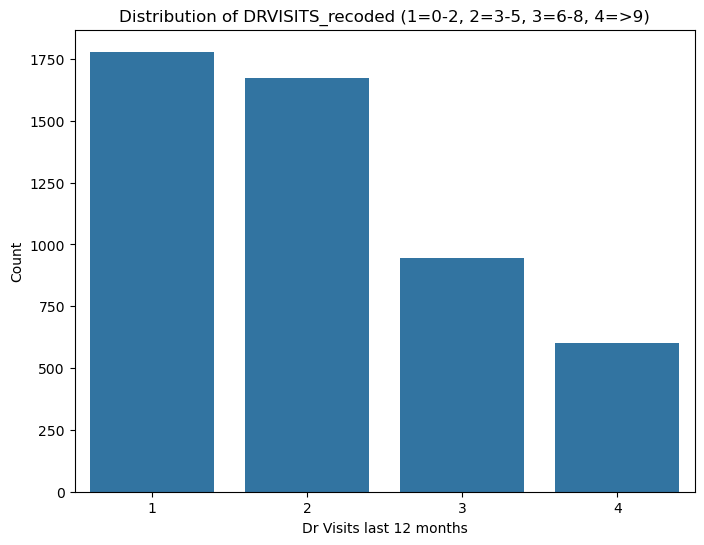

In [19]:
# Recode DRVISITS for fewer categories and better ballance

# Print original value counts for comparison
print("Original DRVISITS distribution:")
print(BFRSS2014_df['DRVISITS_recoded'].value_counts().sort_index())

# Create a dictionary to map the old values to the new ones
drvis_recoded = {
    0: 1, 1: 1, 2: 1, # Grouping categories 1 and 2 into new category 1
    3: 2, 4: 2, 5: 2, # Category 3 becomes new category 2
    6: 3, 7: 3, 8: 3, # Category 4 becomes new category 3
    9: 4, 10: 4, 11: 4, 12: 4,  # Category 4 becomes new category 3   
}

# Apply the recoding to the DataFrame and store it in a new column
BFRSS2014_df['DRVISITS_recoded_2'] = BFRSS2014_df['DRVISITS_recoded'].replace(drvis_recoded)

# Print the new value counts to verify the recoding
print("\nRecoded Doctor Visits distribution:")
print(BFRSS2014_df['DRVISITS_recoded_2'].value_counts().sort_index())

# Visualization: Bar plot for DRVISITS_recoded_2 
plt.figure(figsize=(8, 6))
sns.countplot(x='DRVISITS_recoded_2', data=BFRSS2014_df)
plt.title('Distribution of DRVISITS_recoded (1=0-2, 2=3-5, 3=6-8, 4=>9)')
plt.xlabel('Dr Visits last 12 months')
plt.ylabel('Count')
plt.show()

#### EMPLOY1


Variable distribution:
1.0    2062
2.0     414
3.0     128
4.0     103
5.0     307
6.0      99
7.0    1544
8.0     343
Name: EMPLOY1, dtype: int64


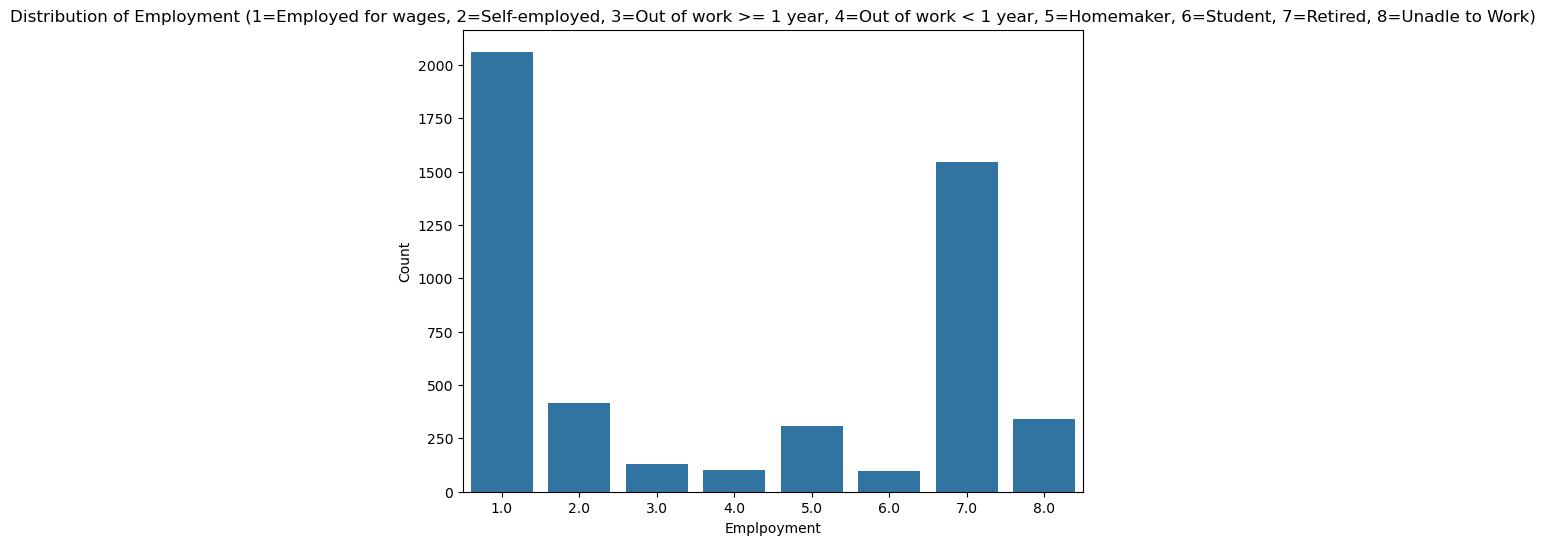

In [245]:
# Review the EMPLOY1 variable
print("\nVariable distribution:")
income_counts=BFRSS2014_df['EMPLOY1'].value_counts().sort_index()
print(income_counts)

# Visualization: Bar plot for EMPLOY1 
plt.figure(figsize=(8, 6))
sns.countplot(x='EMPLOY1', data=BFRSS2014_df)
plt.title('Distribution of Employment (1=Employed for wages, 2=Self-employed, 3=Out of work >= 1 year, 4=Out of work < 1 year, 5=Homemaker, 6=Student, 7=Retired, 8=Unadle to Work)')
plt.xlabel('Emplpoyment')
plt.ylabel('Count')
plt.show()

Original EMPLOY distribution:
1.0    2062
2.0     414
3.0     128
4.0     103
5.0     307
6.0      99
7.0    1544
8.0     343
Name: EMPLOY1, dtype: int64

Recoded employment distribution:
1.0    2476
2.0    1544
3.0     406
4.0     574
Name: EMPLOY_recoded, dtype: int64


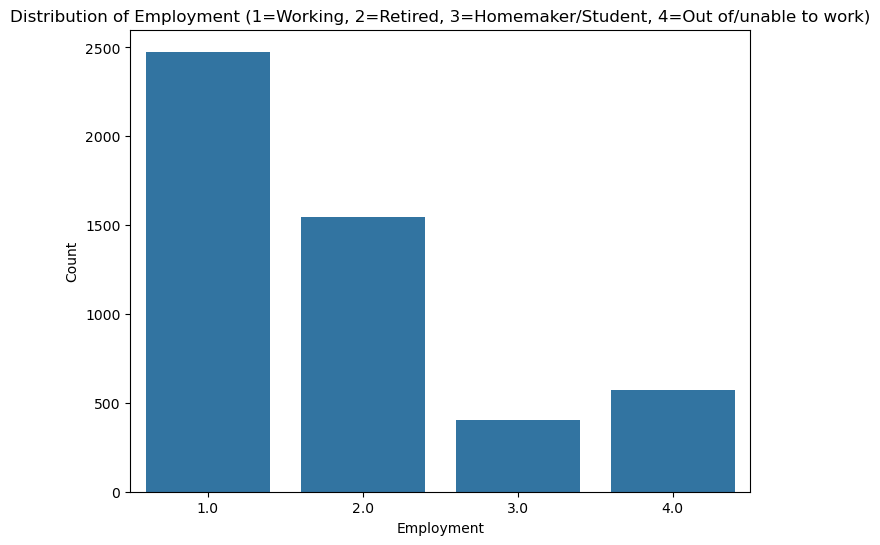

In [20]:
# Recode EMPLOY1 for better ballance

# Print original value counts for comparison
print("Original EMPLOY distribution:")
print(BFRSS2014_df['EMPLOY1'].value_counts().sort_index())

# Create a dictionary to map the old values to the new ones
employ_recode = {
    1: 1, 2: 1,  # Grouping categories 1 and 2 into new category 1
    7: 2,   # Category 7 becomes new category 2
    5: 3, 6:3,  # Grouping categories 5 and 6 into new category 3 
    3: 4, 4: 4, 8: 4,   # Grouping categories 3, 4 and 8 into new category 4   
}

# Apply the recoding to the DataFrame and store it in a new column
BFRSS2014_df['EMPLOY_recoded'] = BFRSS2014_df['EMPLOY1'].replace(employ_recode)

# Print the new value counts to verify the recoding
print("\nRecoded employment distribution:")
print(BFRSS2014_df['EMPLOY_recoded'].value_counts().sort_index())

# Visualization: Bar plot for INCOME_recoded 
plt.figure(figsize=(8, 6))
sns.countplot(x='EMPLOY_recoded', data=BFRSS2014_df)
plt.title('Distribution of Employment (1=Working, 2=Retired, 3=Homemaker/Student, 4=Out of/unable to work)')
plt.xlabel('Employment')
plt.ylabel('Count')
plt.show()

#### MENTHLTH


Variable distribution:
0.0     3541
1.0      149
2.0      215
3.0      145
4.0       68
5.0      170
6.0       14
7.0       66
8.0       15
9.0        1
10.0     116
11.0       1
12.0      10
13.0       1
14.0      26
15.0     105
16.0       1
18.0       3
20.0      55
21.0       7
22.0       2
24.0       1
25.0      19
26.0       3
28.0       3
29.0       4
30.0     259
Name: MENTHLTH, dtype: int64
Unique MENTHLTH values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30]


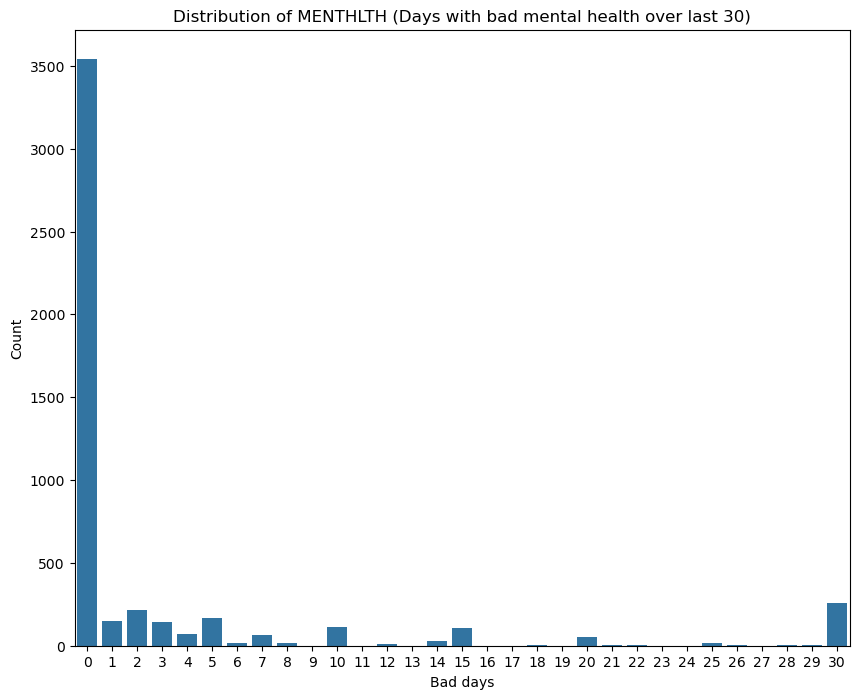

In [21]:
# Review the MENTHLTH variable
print("\nVariable distribution:")
menthlth_counts = BFRSS2014_df['MENTHLTH'].value_counts().sort_index()
print(menthlth_counts)

# Ensure MENTHLTH is integer type
BFRSS2014_df['MENTHLTH'] = BFRSS2014_df['MENTHLTH'].astype(int)

# Get unique values for the order parameter
unique_days = sorted(BFRSS2014_df['MENTHLTH'].unique())
print("Unique MENTHLTH values:", unique_days)  # Debug to confirm all values are included

# Visualization: Bar plot for MENTHLTH 
plt.figure(figsize=(10, 8))  # Adjust to ensure all ticks are visible
sns.countplot(x='MENTHLTH', data=BFRSS2014_df, order=range(0, 31))  # Explicitly include 0 to 30
plt.title('Distribution of MENTHLTH (Days with bad mental health over last 30)')
plt.xlabel('Bad days')
plt.ylabel('Count')
plt.show()


Original Variable distribution:
0     3541
1      149
2      215
3      145
4       68
5      170
6       14
7       66
8       15
9        1
10     116
11       1
12      10
13       1
14      26
15     105
16       1
18       3
20      55
21       7
22       2
24       1
25      19
26       3
28       3
29       4
30     259
Name: MENTHLTH, dtype: int64

Recoded Variable distribution:
0    3541
1     747
2     355
3     357
Name: MENTHLTH_recode, dtype: int64


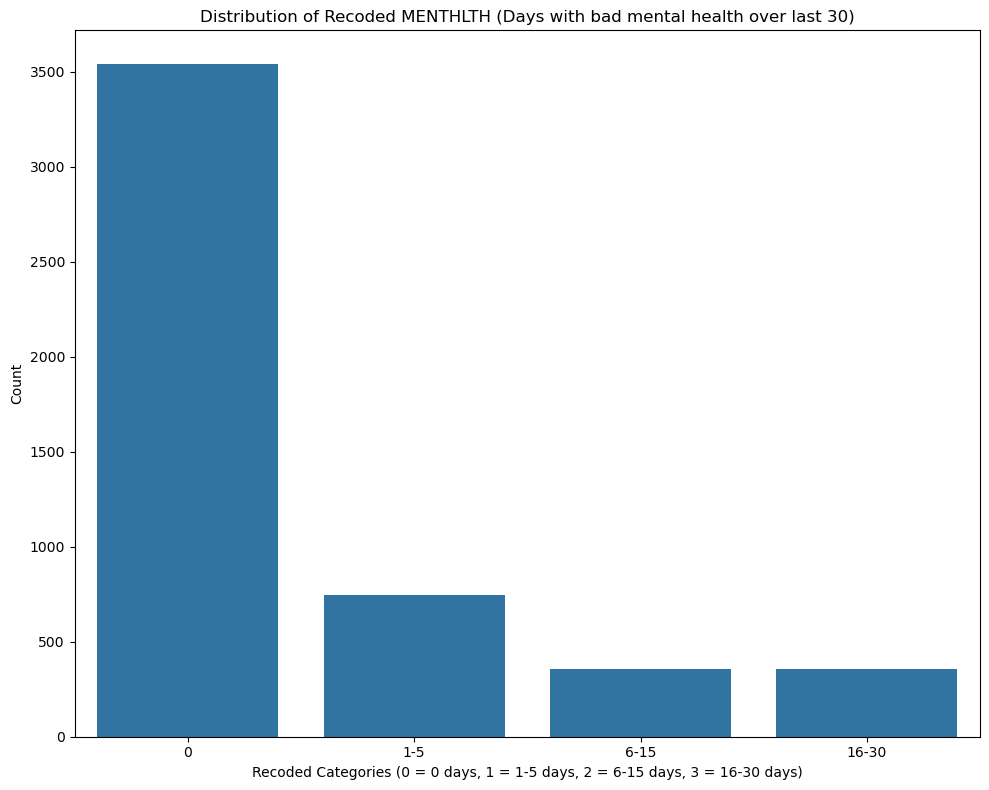

In [22]:
# Recode MENTHLTH for better ballance

# Print original value counts for comparison
print("\nOriginal Variable distribution:")
menthlth_counts = BFRSS2014_df['MENTHLTH'].value_counts().sort_index()
print(menthlth_counts)

# Ensure MENTHLTH is integer type
BFRSS2014_df['MENTHLTH'] = BFRSS2014_df['MENTHLTH'].astype(int)

# Recode MENTHLTH into new categories: 0 = 0, 1 = 1-5, 2 = 6-15, 3 = 16-30
def recode_menthlth(days):
    if days == 0:
        return 0
    elif 1 <= days <= 5:
        return 1
    elif 6 <= days <= 15:
        return 2
    elif 16 <= days <= 30:
        return 3
    else:
        return np.nan  # Handle any unexpected values

# Apply recoding to create a new column
BFRSS2014_df['MENTHLTH_recode'] = BFRSS2014_df['MENTHLTH'].apply(recode_menthlth)

# Verify recoded distribution
print("\nRecoded Variable distribution:")
recode_counts = BFRSS2014_df['MENTHLTH_recode'].value_counts().sort_index()
print(recode_counts)

# Visualization: Bar plot for recoded MENTHLTH
plt.figure(figsize=(10, 8))
sns.countplot(x='MENTHLTH_recode', data=BFRSS2014_df, order=[0, 1, 2, 3])
plt.title('Distribution of Recoded MENTHLTH (Days with bad mental health over last 30)')
plt.xlabel('Recoded Categories (0 = 0 days, 1 = 1-5 days, 2 = 6-15 days, 3 = 16-30 days)')
plt.ylabel('Count')
# Set x-axis ticks to show only 0, 1, 2, 3
plt.xticks(ticks=[0, 1, 2, 3], labels=['0', '1-5', '2-15', '3-30'])
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}' if x == 0 else ['1-5', '6-15', '16-30'][int(x)-1]))

plt.tight_layout()
plt.show()

In [23]:
# check for new variables
BFRSS2014_df.shape

(5000, 44)

#### Explore and Evaluate Target Variable (DIABETE3_binary) with Potential Feature Variables


Cross-tabulation of DIABETE3_binary and BMI_recoded:
BMI_recoded         1     2     3
DIABETE3_binary                  
0                1566  1668  1063
1                 101   236   366


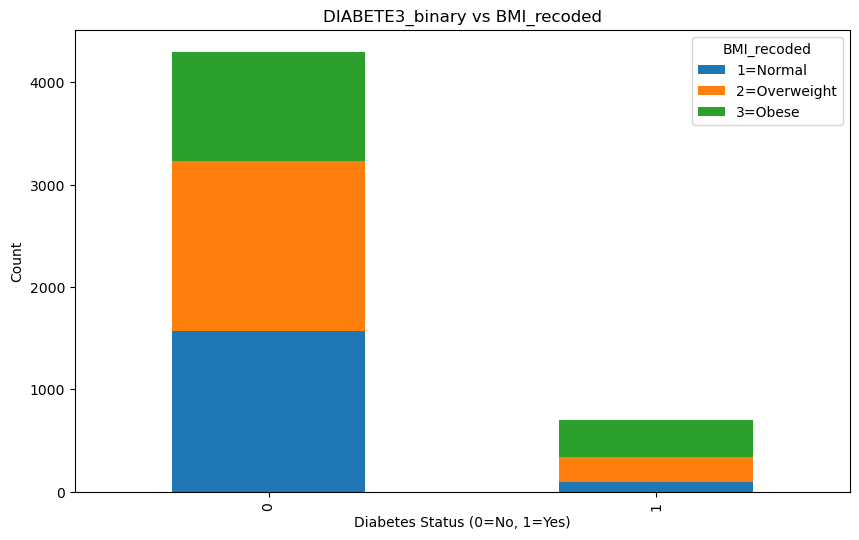

In [309]:
# Creat a cross-tab for exploring DIABETE3_bunary with variables of interest.
# Iterate through select variables as needed

print("\nCross-tabulation of DIABETE3_binary and BMI_recoded:")
crosstab_bmi = pd.crosstab(BFRSS2014_df['DIABETE3_binary'], BFRSS2014_df['BMI_recoded'])
print(crosstab_bmi)

# Visualization: Stacked bar plot for DIABETE3_binary vs _BMI5CAT
crosstab_bmi.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('DIABETE3_binary vs BMI_recoded')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='BMI_recoded', labels=['1=Normal', '2=Overweight', '3=Obese'])
plt.show()

# <span style="color: red;">★</span> 
#### Added for Module 3 with GENHLTH recoded for reduced Categories


Cross-tabulation of DIABETE3_binary and GENHLTH_recoded:
GENHLTH_recoded   1.0   2.0  3.0
DIABETE3_binary                 
0                2413  1244  640
1                 136   268  299


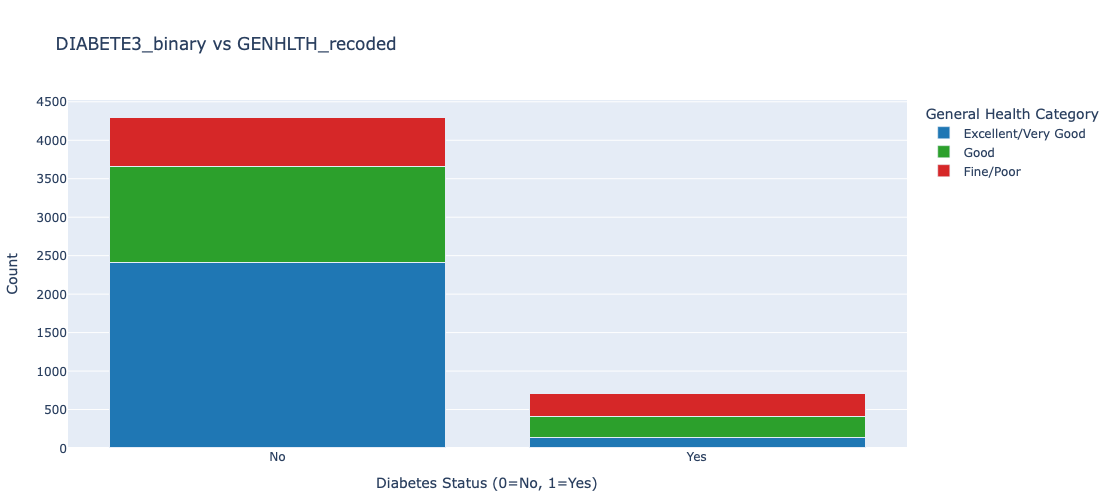

In [47]:
# This can alaso be done with interactive plots using plotly
import plotly.express as px

# Create cross-tabulation
cross_tab = pd.crosstab(BFRSS2014_df['DIABETE3_binary'], BFRSS2014_df['GENHLTH_recoded'])
print("\nCross-tabulation of DIABETE3_binary and GENHLTH_recoded:")
print(cross_tab)

# Prepare data for Plotly (melt cross_tab to long format)
cross_tab_reset = cross_tab.reset_index()
cross_tab_melted = cross_tab_reset.melt(
    id_vars='DIABETE3_binary',
    value_vars=cross_tab.columns,
    var_name='GENHLTH_recoded',
    value_name='count'
)

# Define custom labels for GENHLTH_recoded
genhlth_labels = {
    1: 'Excellent/Very Good',
    2: 'Good',
    3: 'Fine/Poor'
}

# Map GENHLTH values to labels
cross_tab_melted['GENHLTH_recoded'] = cross_tab_melted['GENHLTH_recoded'].map(genhlth_labels)

# Create interactive stacked bar plot
fig = px.bar(
    cross_tab_melted,
    x='DIABETE3_binary',
    y='count',
    color='GENHLTH_recoded',
    barmode='stack',
    labels={
        'DIABETE3_binary': 'Diabetes Status (0=No, 1=Yes)',
        'count': 'Count',
        'GENHLTH': 'General Health Category'
    },
    title='DIABETE3_binary vs GENHLTH_recoded',
    color_discrete_map={
        'Excellent/Very Good': '#1f77b4',  # Blue
        'Good': '#2ca02c',  # Green
        'Fine/Poor': '#d62728'        # Red
    }
)

# Update layout for readability
fig.update_layout(
    width=800,
    height=500,
    legend_title_text='General Health Category ',
    xaxis=dict(tickvals=[0, 1], ticktext=['No', 'Yes']),
    margin=dict(l=50, r=50, t=100, b=50)
)

# Show the plot
fig.show()


Cross-tabulation of DIABETE3_binary and AGE:
AGE_recoded      1.0  2.0   3.0   4.0
DIABETE3_binary                      
0                722  870  1336  1369
1                 15   42   254   392


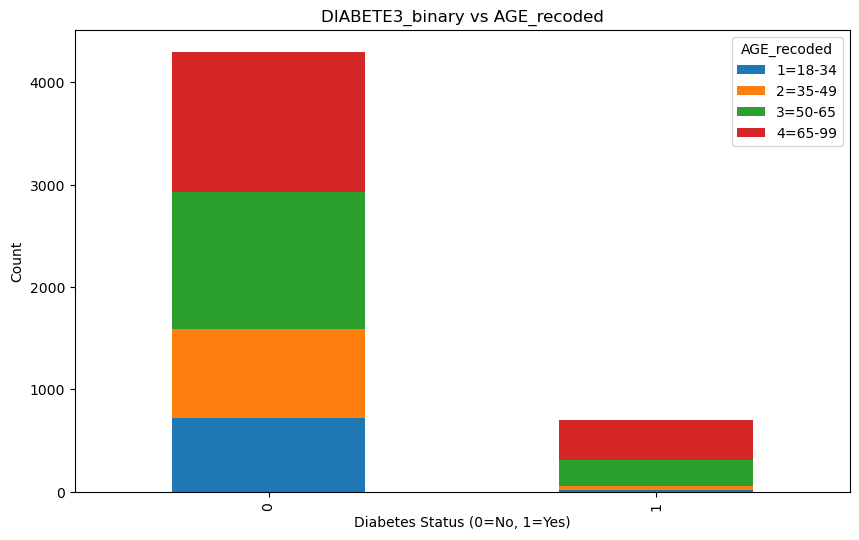

In [310]:
# Creat a cross-tab for exploring DIABETE3_binary with AGE_recoded.

print("\nCross-tabulation of DIABETE3_binary and AGE:")
crosstab_age = pd.crosstab(BFRSS2014_df['DIABETE3_binary'], BFRSS2014_df['AGE_recoded'])
print(crosstab_age)

# Visualization: Stacked bar plot for DIABETE3_binary vs AGE_recoded
crosstab_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('DIABETE3_binary vs AGE_recoded')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='AGE_recoded', labels=['1=18-34', '2=35-49', '3=50-65', '4=65-99'])
plt.show()


Cross-tabulation of DIABETE3_binary and INCOME_recoded:
INCOME_recoded   1.0  2.0   3.0  4.0   5.0
DIABETE3_binary                           
0                649  706  1199  580  1163
1                158  160   217   65   103


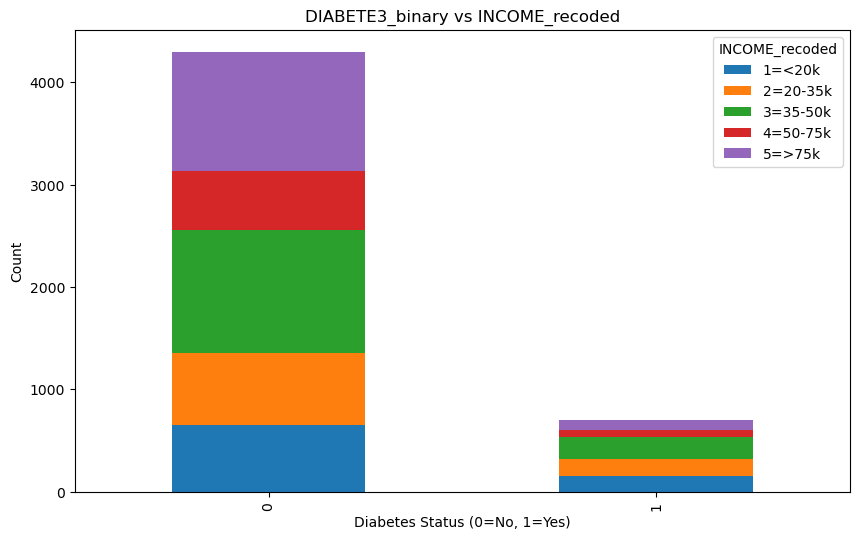

In [313]:
# Creat a cross-tab for exploring DIABETE3_binary with INCOME_recoded.

print("\nCross-tabulation of DIABETE3_binary and INCOME_recoded:")
crosstab_income = pd.crosstab(BFRSS2014_df['DIABETE3_binary'], BFRSS2014_df['INCOME_recoded'])
print(crosstab_income)

# Visualization: Stacked bar plot for DIABETE3_binary vs AGE_recoded
crosstab_income.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('DIABETE3_binary vs INCOME_recoded')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='INCOME_recoded', labels=['1=<20k', '2=20-35k', '3=35-50k', '4=50-75k', '5=>75k'])
plt.show()


Cross-tabulation of DIABETE3_binary and EMPLOY_recoded:
EMPLOY_recoded    1.0   2.0  3.0  4.0
DIABETE3_binary                      
0                2300  1185  368  444
1                 176   359   38  130


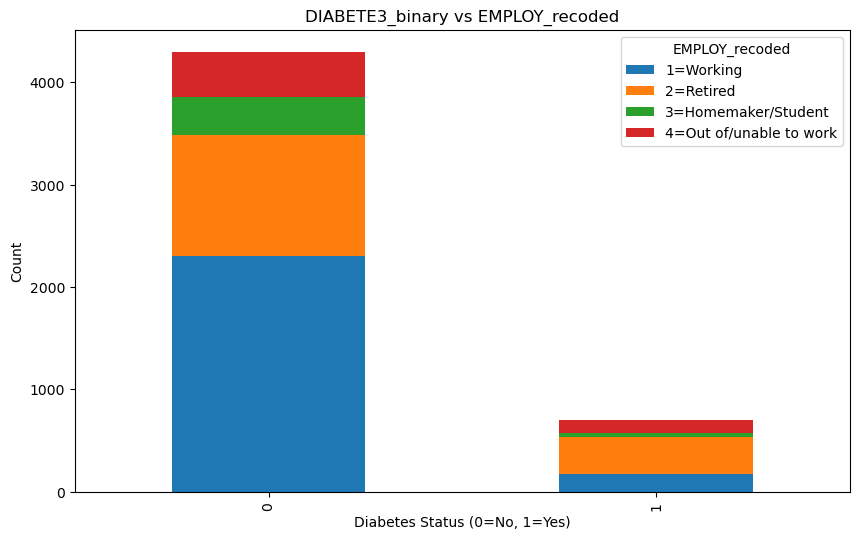

In [315]:
# Creat a cross-tab for exploring DIABETE3_binary with EMPLOY_recoded.

print("\nCross-tabulation of DIABETE3_binary and EMPLOY_recoded:")
crosstab_employ = pd.crosstab(BFRSS2014_df['DIABETE3_binary'], BFRSS2014_df['EMPLOY_recoded'])
print(crosstab_employ)

# Visualization: Stacked bar plot for DIABETE3_binary vs AGE_recoded
crosstab_employ.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('DIABETE3_binary vs EMPLOY_recoded')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='EMPLOY_recoded', labels=['1=Working', '2=Retired', '3=Homemaker/Student', '4=Out of/unable to work'])
plt.show()


Cross-tabulation of DIABETE3_binary and MENTHLTH_recode:
MENTHLTH_recode     0    1    2    3
DIABETE3_binary                     
0                3032  679  299  287
1                 509   68   56   70


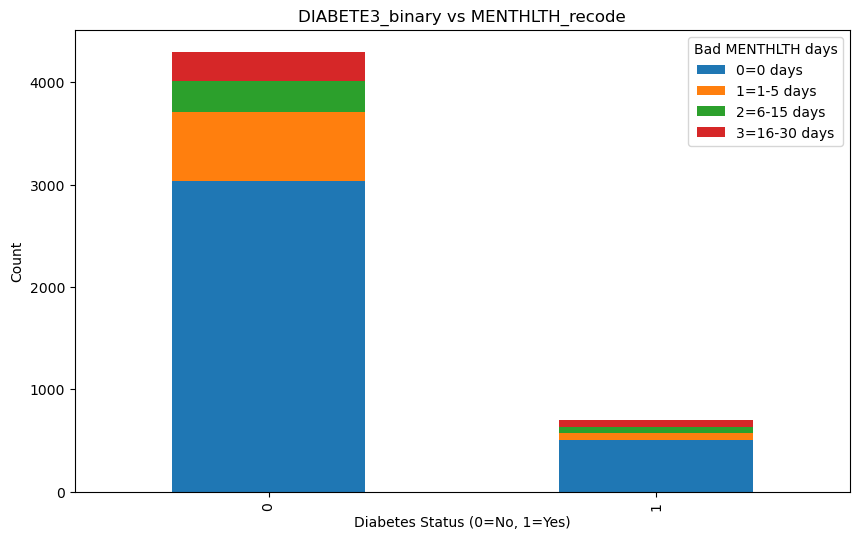

In [320]:
# Creat a cross-tab for exploring DIABETE3_binary with MENHLTH_recode.

print("\nCross-tabulation of DIABETE3_binary and MENTHLTH_recode:")
crosstab_menthlth = pd.crosstab(BFRSS2014_df['DIABETE3_binary'], BFRSS2014_df['MENTHLTH_recode'])
print(crosstab_menthlth)

# Visualization: Stacked bar plot for DIABETE3_binary vs AGE_recoded
crosstab_menthlth.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('DIABETE3_binary vs MENTHLTH_recode')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Bad MENTHLTH days', labels=['0=0 days', '1=1-5 days', '2=6-15 days', '3=16-30 days'])
plt.show()


Cross-tabulation of DIABETE3_binary and EXERANY2:
EXERANY2          1.0  2.0
DIABETE3_binary           
0                3336  961
1                 436  267


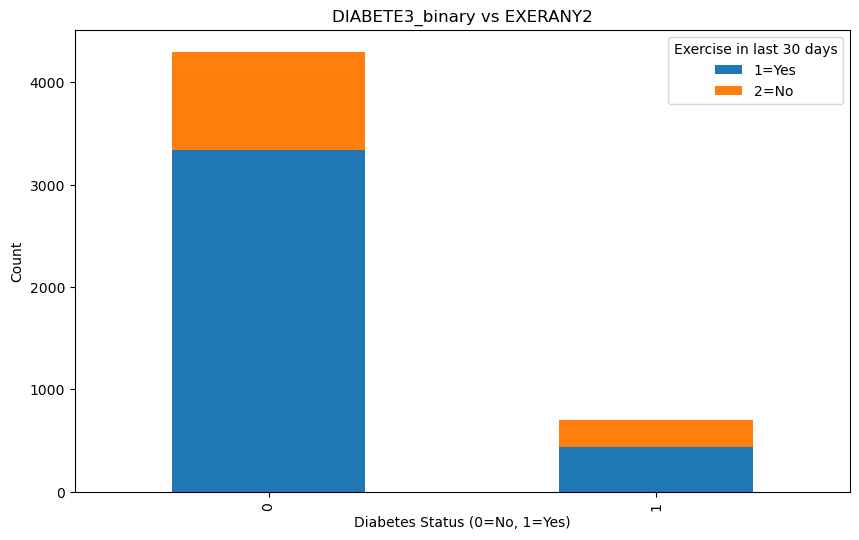

In [322]:
# Creat a cross-tab for exploring DIABETE3_binary with EXERANY2.

print("\nCross-tabulation of DIABETE3_binary and EXERANY2:")
crosstab_exerany = pd.crosstab(BFRSS2014_df['DIABETE3_binary'], BFRSS2014_df['EXERANY2'])
print(crosstab_exerany)

# Visualization: Stacked bar plot for DIABETE3_binary vs EXERANY2
crosstab_exerany.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('DIABETE3_binary vs EXERANY2')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Exercise in last 30 days', labels=['1=Yes', '2=No'])
plt.show()

# <span style="color: red;">★</span> 
#### Aded for Module 3 after DRVISITS recoded to reduced Categories


Cross-tabulation of DIABETE3_binary and DRVISITS_recoded_2:
DRVISITS_recoded_2     1     2    3    4
DIABETE3_binary                         
0                   1619  1414  801  463
1                    160   260  144  139


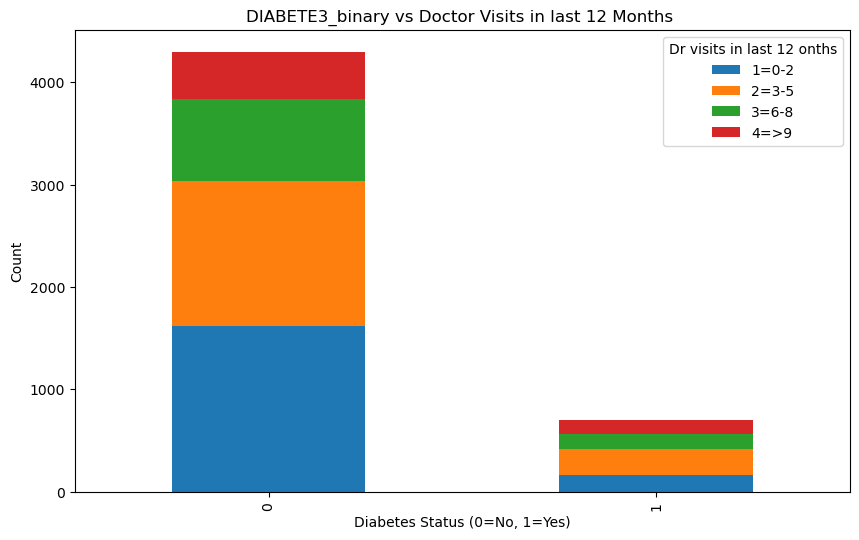

In [49]:
# Creat a cross-tab for exploring DIABETE3_binary with DRVISITS_recoded_2.

print("\nCross-tabulation of DIABETE3_binary and DRVISITS_recoded_2:")
crosstab_exerany = pd.crosstab(BFRSS2014_df['DIABETE3_binary'], BFRSS2014_df['DRVISITS_recoded_2'])
print(crosstab_exerany)

# Visualization: Stacked bar plot for DIABETE3_binary vs DRVISITS_recoded_2
crosstab_exerany.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('DIABETE3_binary vs Doctor Visits in last 12 Months ')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Dr visits in last 12 onths', labels=['1=0-2', '2=3-5', '3=6-8', '4=>9'])
plt.show()

##  Begin Feature Selection Process

#### Perform PCA to asses Component loadings

In [330]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Conduct PCA analyses 

# copy BFRSS2014_df to df to avoid modifying origional dataframe until ready
df = BFRSS2014_df.copy()

# Select numerical features (exclude target and any non-predictors like PERSONID)
features = df.select_dtypes(include=['int64', 'float64']).columns.drop(['DIABETE3_binary', 'DIABETE3', 'PERSONID',
                                                                        '_TOTINDA', 'WEIGHT2', 'WEIGHT2_capped', 'DRVISITS',
                                                                       'INCOME2', '_AGEG5YR', '_BMI5CAT', 'DRVISITS_capped',
                                                                       'EMPLOY1', 'MENTHLTH']) 
X = df[features]
y = df['DIABETE3_binary']

# Scale features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA 
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Get loadings (feature contributions to components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features)

# Print loadings for the first few components
print("PCA Loadings (Feature Importance per Component):")
print(loadings.sort_values(by='PC1', ascending=False))  # Sort by PC1 as example
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

PCA Loadings (Feature Importance per Component):
                       PC1       PC2       PC3       PC4       PC5       PC6  \
GENHLTH           0.355256  0.080942  0.026101 -0.233231 -0.086261 -0.009495   
EMPLOY_recoded    0.304787  0.039307 -0.050786  0.134691  0.057425  0.204636   
MENTHLTH_recode   0.248781 -0.150726  0.363380  0.111254  0.150152 -0.052923   
EXERANY2          0.219330  0.031728 -0.109663 -0.221248  0.038334  0.134616   
HLTHCVR1          0.208037  0.062508 -0.221739  0.119973 -0.099218  0.188788   
RENTHOM1          0.178891 -0.293072 -0.098920  0.188065 -0.217857 -0.089349   
DRVISITS_recoded  0.163043  0.172467  0.248379  0.129858 -0.183708 -0.037263   
MARITAL           0.141627 -0.230892 -0.214526  0.344982 -0.226856 -0.318985   
BMI_recoded       0.113554  0.056844  0.077397 -0.403348 -0.244098 -0.051855   
_RACE             0.090706 -0.251031 -0.094303 -0.069818 -0.257004  0.324164   
AGE_recoded       0.088465  0.484122 -0.219326 -0.041677  0.137384  0.0

#### Perform Recursive Feature Elimination (RFE)

In [328]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Conduct RFE

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# RFE with LogisticRegression (select top 15 features as example)
model = LogisticRegression(class_weight='balanced', max_iter=1000) 
rfe = RFE(model, n_features_to_select=15) 
rfe.fit(X_train, y_train)

# Get selected features
selected_features = features[rfe.support_]
print("Selected Features by RFE:")
print(selected_features)

# Evaluate with selected features
model.fit(X_train[:, rfe.support_], y_train)
y_pred = model.predict(X_test[:, rfe.support_])
print("\nAccuracy with Selected Features:", accuracy_score(y_test, y_pred))

Selected Features by RFE:
Index(['SEX', 'CVDCRHD4', 'BLIND', 'ASTHMA3', 'GENHLTH', 'CHECKUP1', '_EDUCAG',
       '_SMOKER3', 'NUMADULT', 'CHILDREN', 'INCOME_recoded', 'AGE_recoded',
       'BMI_recoded', 'DRVISITS_recoded', 'EMPLOY_recoded'],
      dtype='object')

Accuracy with Selected Features: 0.713


#### Perform Forward Selection

Forward Selection with F1-score:

Selected Features: ['GENHLTH', 'AGE_recoded', 'INCOME_recoded', 'MSCODE', '_EDUCAG', '_RACE', 'RENTHOM1', 'SLEPTIM1', 'HLTHCVR1', 'MARITAL', 'DECIDE', 'MENTHLTH_recode', 'ADDEPEV2', 'EMPLOY_recoded', 'CHILDREN']
Final F1-score: 0.4353
Final Accuracy: 0.7380


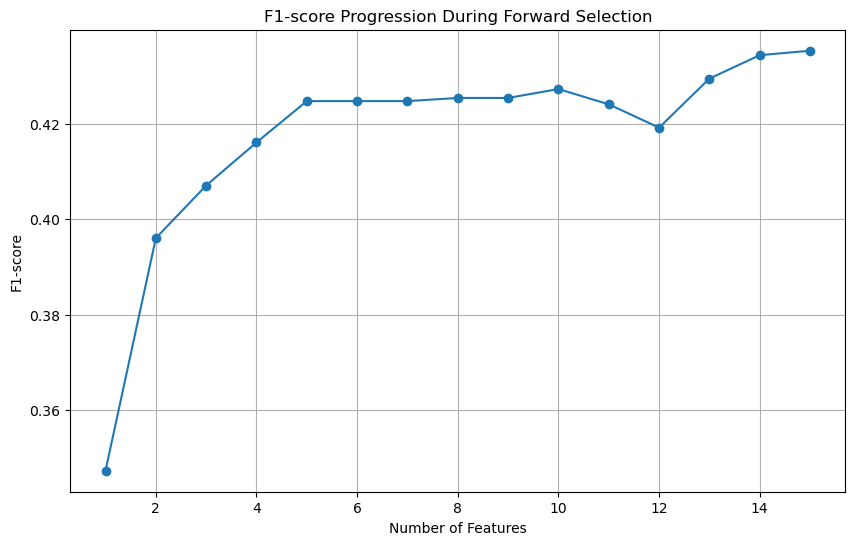

In [331]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Conduct Forward Selection with F1-Score progression chart 

# copy BFRSS2014_df to df to avoid modifying origional dataframe until ready
df = BFRSS2014_df.copy()

# Select features (exclude target and non-predictors)
features = df.select_dtypes(include=['int64', 'float64']).columns.drop(['DIABETE3_binary', 'DIABETE3', 'PERSONID',
                                                                        '_TOTINDA', 'WEIGHT2', 'WEIGHT2_capped', 'DRVISITS',
                                                                       'INCOME2', '_AGEG5YR', '_BMI5CAT', 'DRVISITS_capped',
                                                                       'EMPLOY1', 'MENTHLTH'])
X = df[features]
y = df['DIABETE3_binary']


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Split data (80/20, stratified for imbalance)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

# Conduct Forward Selection with F1-score
def forward_selection(X_train, X_test, y_train, y_test, features, max_features=15):
    selected_features = []
    best_f1 = 0
    remaining_features = list(features)
    f1_scores = []

    while remaining_features and len(selected_features) < max_features:
        f1_results = []
        for feature in remaining_features:
            current_features = selected_features + [feature]
            model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
            model.fit(X_train[current_features], y_train)
            y_pred = model.predict(X_test[current_features])
            f1 = f1_score(y_test, y_pred)
            f1_results.append((feature, f1))

        # Select feature with highest F1-score
        f1_results.sort(key=lambda x: x[1], reverse=True)
        best_feature, best_feature_f1 = f1_results[0]


        # Add feature even if small improvement
        selected_features.append(best_feature)
        best_f1 = best_feature_f1
        f1_scores.append(best_f1)
        remaining_features.remove(best_feature)

    # Evaluate final model
    model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    final_f1 = f1_score(y_test, y_pred)
    final_accuracy = accuracy_score(y_test, y_pred)

    return selected_features, final_f1, final_accuracy, f1_scores

# Display Forward Selection results
print("Forward Selection with F1-score:")
selected_features, final_f1, final_accuracy, f1_scores = forward_selection(X_train, X_test, y_train, y_test, features, max_features=15)
print("\nSelected Features:", selected_features)
print(f"Final F1-score: {final_f1:.4f}")
print(f"Final Accuracy: {final_accuracy:.4f}")

# Visualize F1-score progression
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o')
plt.title('F1-score Progression During Forward Selection')
plt.xlabel('Number of Features')
plt.ylabel('F1-score')
plt.grid(True)
plt.show()

### Selected Features


In [27]:
# Define final feature set
selected_features = [
    'GENHLTH_recoded', 'BMI_recoded', 'AGE_recoded', 'INCOME_recoded', '_EDUCAG', 'MENTHLTH_recode',
    'EMPLOY_recoded', 'CVDCRHD4', 'CHCKIDNY', 'DRVISITS_recoded_2', 'EXERANY2', 'DECIDE'
]
print("Final Selected Features:", selected_features)

Final Selected Features: ['GENHLTH_recoded', 'BMI_recoded', 'AGE_recoded', 'INCOME_recoded', '_EDUCAG', 'MENTHLTH_recode', 'EMPLOY_recoded', 'CVDCRHD4', 'CHCKIDNY', 'DRVISITS_recoded_2', 'EXERANY2', 'DECIDE']


In [28]:
# Check for missing values after all preprocessing
print("\nMissing Values in Selected Features:")
print(BFRSS2014_df[selected_features].isna().sum())


Missing Values in Selected Features:
GENHLTH_recoded       0
BMI_recoded           0
AGE_recoded           0
INCOME_recoded        0
_EDUCAG               0
MENTHLTH_recode       0
EMPLOY_recoded        0
CVDCRHD4              0
CHCKIDNY              0
DRVISITS_recoded_2    0
EXERANY2              0
DECIDE                0
dtype: int64


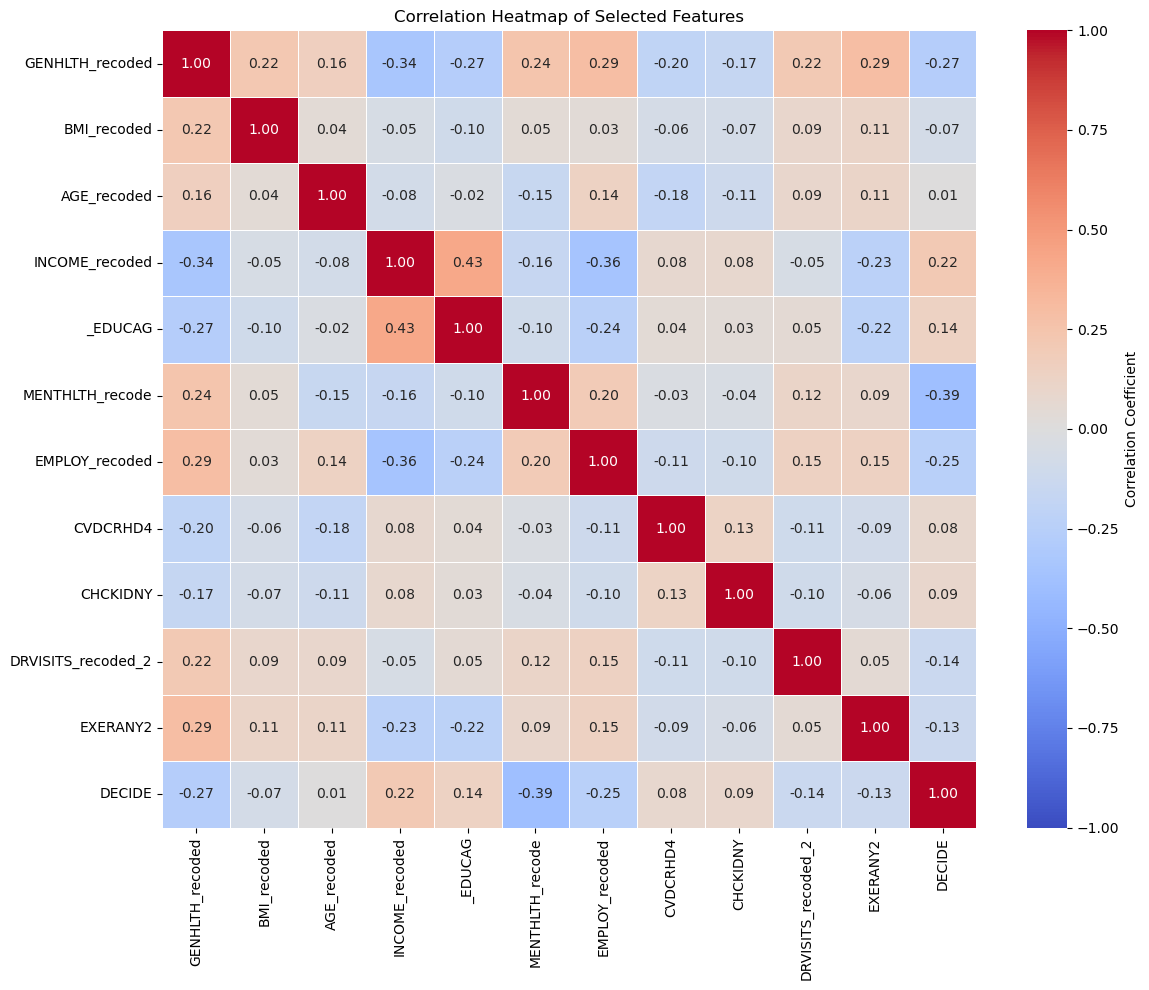

In [54]:
# Create a correlation heatmap of final feature set
# Compute the correlation matrix
correlation_matrix = BFRSS2014_df[selected_features].corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',       
            vmin=-1, vmax=1,      # Set color scale limits
            fmt='.2f',             # Format numbers to 2 decimal places
            linewidths=0.5,        # Add lines between cells
            cbar_kws={'label': 'Correlation Coefficient'})  # Colorbar label
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

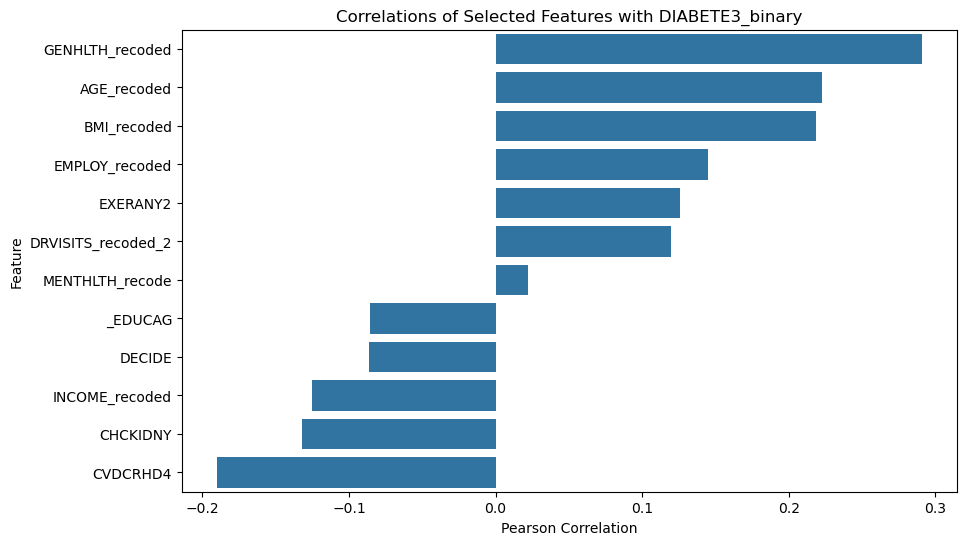

In [56]:
#Visualize correlations with DIABETE3_binary
corr_with_target = BFRSS2014_df[selected_features].corrwith(df['DIABETE3_binary']).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlations of Selected Features with DIABETE3_binary')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.show()

#### One-hot encoding of categorical variables


# <span style="color: red;">★</span> 
#### Updated for Module 3 with reduced Categories (reduced from 38 to 27 after one-hot encoding.

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

# copy BFRSS2014_df to df to avoid modifying origional dataframe
df = BFRSS2014_df.copy()

# One-hot encode categorical features
categorical_cols = selected_features  # Treat all as categorical
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
X_encoded = encoder.fit_transform(df[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols, index=df.index)

In [10]:
X_encoded_df.shape

(5000, 27)

In [9]:
X_encoded_df.columns

Index(['GENHLTH_recoded_2.0', 'GENHLTH_recoded_3.0', 'BMI_recoded_2',
       'BMI_recoded_3', 'AGE_recoded_2.0', 'AGE_recoded_3.0',
       'AGE_recoded_4.0', 'INCOME_recoded_2.0', 'INCOME_recoded_3.0',
       'INCOME_recoded_4.0', 'INCOME_recoded_5.0', '_EDUCAG_2.0',
       '_EDUCAG_3.0', '_EDUCAG_4.0', 'MENTHLTH_recode_1', 'MENTHLTH_recode_2',
       'MENTHLTH_recode_3', 'EMPLOY_recoded_2.0', 'EMPLOY_recoded_3.0',
       'EMPLOY_recoded_4.0', 'CVDCRHD4_2.0', 'CHCKIDNY_2.0',
       'DRVISITS_recoded_2_2', 'DRVISITS_recoded_2_3', 'DRVISITS_recoded_2_4',
       'EXERANY2_2.0', 'DECIDE_2'],
      dtype='object')

#### Reload data if needed

In [9]:
BFRSS2014_df = pd.read_csv('my_data_3.csv')

In [10]:
X_encoded_df = pd.read_csv('x_encoded_df_2.csv')

#### Train-Test split and compute class weights due to imbalanced data

In [18]:
binary_counts = BFRSS2014_df['DIABETE3_binary'].value_counts().sort_index()
print(binary_counts)

0    4297
1     703
Name: DIABETE3_binary, dtype: int64


In [61]:
# Class weight for Class 1
class1_weight=4297/703
print("\nClass 1 Weight:", class1_weight)


Class 1 Weight: 6.112375533428165


In [19]:

# Prepare target and train-test split
y = BFRSS2014_df['DIABETE3_binary']
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df, y, test_size=0.2, random_state=42, stratify=y
)

# Compute class weights for imbalanced data
class_counts = y.value_counts()
class_weights = {0: 1.0, 1: class_counts[0] / class_counts[1]}  # ~6.11 for Yes
print("\nClass Weights:", class_weights)

# Validate shapes
print("\nTrain Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)


Class Weights: {0: 1.0, 1: 6.112375533428165}

Train Shape: (4000, 27) (4000,)
Test Shape: (1000, 27) (1000,)


In [20]:
# Added scaling of features (May still be helpful for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Save data for easy reload after Module 2

In [64]:
# Save BFRSS2014_df as configured after Module 2  updates for easy reload after kernel restart.
BFRSS2014_df.to_csv('my_data_.csv', index=False)

In [66]:
# Save x_encoded_df as configured after Module 2 updates for easy reload after kernel restart.
X_encoded_df.to_csv('x_encoded_df.csv', index=False)

# <span style="color: red;">★</span> Begin Module 3

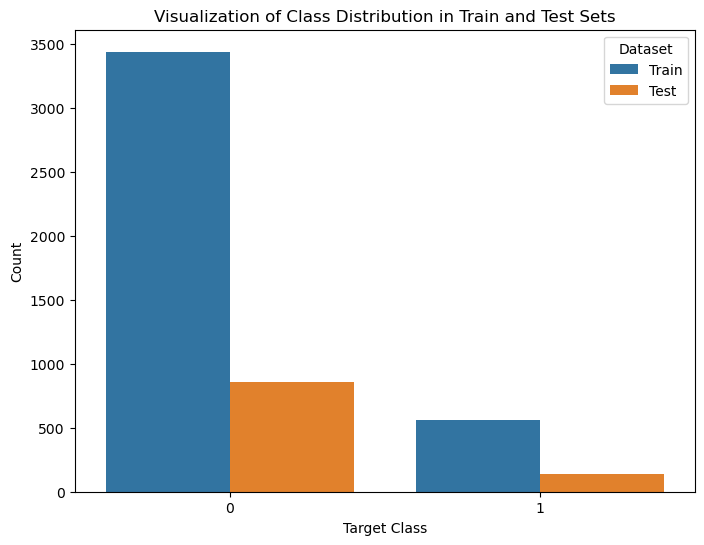

In [76]:
# Create a visualisation of the train_test_split distribution

# Convert to DataFrames for easier plotting
train_df = pd.DataFrame(X_train, columns=['Feature1', 'Feature2'])
train_df['Target'] = y_train
train_df['Set'] = 'Train'
test_df = pd.DataFrame(X_test, columns=['Feature1', 'Feature2'])
test_df['Target'] = y_test
test_df['Set'] = 'Test'

# Combine for plotting
combined_df = pd.concat([train_df, test_df], ignore_index=True)

plt.figure(figsize=(8, 6))
sns.countplot(data=combined_df, x='Target', hue='Set')
plt.title('Visualization of Class Distribution in Train and Test Sets')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.legend(title='Dataset')
plt.show()

In [50]:
# Reusable Evaluation Helpers

def fit_and_scores(model, X_train, y_train, X_test, y_test, name="model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_scores = None
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    metrics = {
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_scores) if y_scores is not None else np.nan
    }
    return metrics, y_pred, y_scores

def plot_confusion(y_true, y_pred, title="Confusion Matrix", cmap='Blues'):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=cmap)  # Set colormap
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['No', 'Yes'])
    ax.set_yticklabels(['No', 'Yes'])
    
    # Define labels for TP, TN, FP, FN
    labels = np.array([['TN', 'FP'], ['FN', 'TP']])
    
    # Add text annotations with TP/TN/FP/FN labels
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # Adjust text color for readability based on cell value
            text_color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
            # Include both the value and the label (e.g., "TN: 50")
            ax.text(j, i, f'{labels[i, j]}: {cm[i, j]}', 
                    ha="center", va="center", color=text_color)
    
    # Add colorbar
    plt.colorbar(im)
    plt.show()

def plot_roc_pr_curves(y_true, y_scores, name="model"):
    if y_scores is None:
        print(f"{name}: No probability/decision scores available to plot ROC/PR.")
        return
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt. figure()
    plt. plot(fpr, tpr, label=name)
    plt. plot ([0,1], [0,1], '--')
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate") 
    plt. title(f"ROC Curve: {name}"); plt.legend(); plt.show()
    prec, rec, _ = precision_recall_curve(y_true, y_scores)
    plt. figure()
    plt. plot(rec, prec, label=name)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve: {name}"); plt.legend(); plt.show()

In [30]:
# Establish a list for results from each model
diabetes_results = []

In [29]:
# to clear results list if needed (every time a model is re-run it adds an iteration to the list)
diabetes_results.clear()

#### Logistic Regression


Logistic Regression - Metrics: {'model': 'Logistic Regression', 'accuracy': 0.72, 'precision': 0.28615384615384615, 'recall': 0.6595744680851063, 'f1': 0.39914163090128757, 'roc_auc': 0.781995392960642}


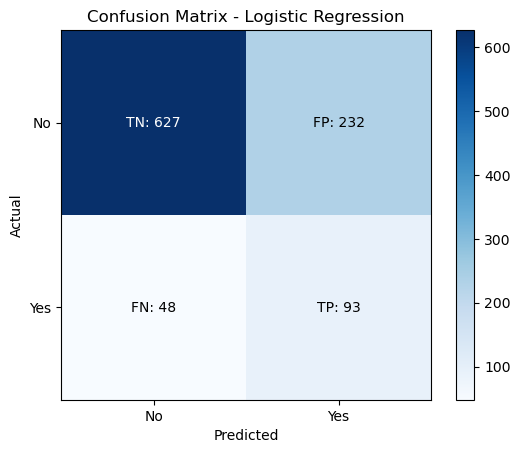

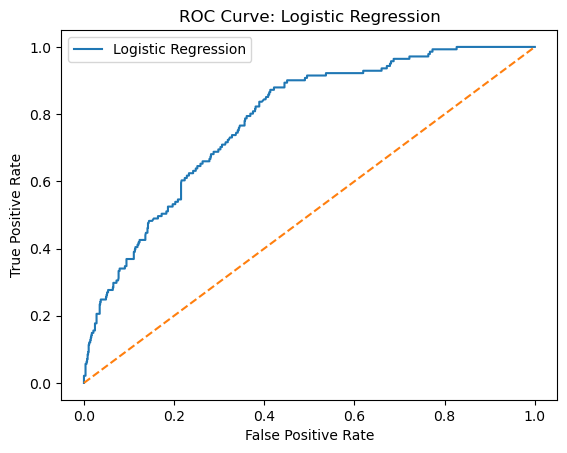

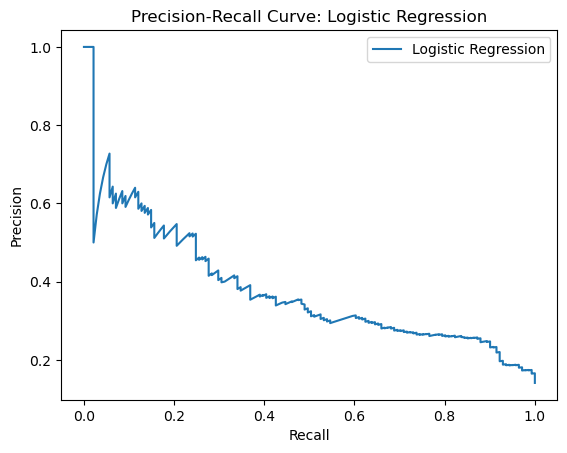

In [36]:
# logistic regression model
logreg = LogisticRegression(max_iter=1000, n_jobs=None, class_weight=class_weights, random_state=RANDOM_STATE)
metrics_lr, y_pred_lr, y_scores_lr = fit_and_scores(logreg, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression")
print(f"\nLogistic Regression - Metrics: {metrics_lr}")
plot_confusion(y_test, y_pred_lr, "Confusion Matrix - Logistic Regression")
plot_roc_pr_curves(y_test, y_scores_lr, "Logistic Regression")
diabetes_results.append({
    'name': "Logistic Regression",
    'model': logreg,
    'accuracy': metrics_lr['accuracy'],
    'precision': metrics_lr['precision'],
    'recall': metrics_lr['recall'],
    'f1': metrics_lr['f1'],
    'roc_auc': metrics_lr['roc_auc'],
    'params': {'C': logreg.C if hasattr(logreg, 'C') else 1.0},
    'y_scores': y_scores_lr  # Ensure this is included
})

In [38]:
# run cross validation for logreg model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_encoded_df, y, cv=5) # cv=5 for 5-fold cross-validation
print(f"Cross-validation scores, Logistic Regression: {scores}")
print(f"Mean accuracy: {np.mean(scores):.2f}")
print(f"Standard deviation of accuracy: {np.std(scores):.3f}")

Cross-validation scores, Logistic Regression: [0.718 0.705 0.734 0.714 0.704]
Mean accuracy: 0.72
Standard deviation of accuracy: 0.011


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation F1-score: 0.432
Tuned Logistic Regression - Metrics: {'model': 'Logistic Regression - Tuned', 'accuracy': 0.708, 'precision': 0.2732732732732733, 'recall': 0.6453900709219859, 'f1': 0.38396624472573837, 'roc_auc': 0.7760260570183044}


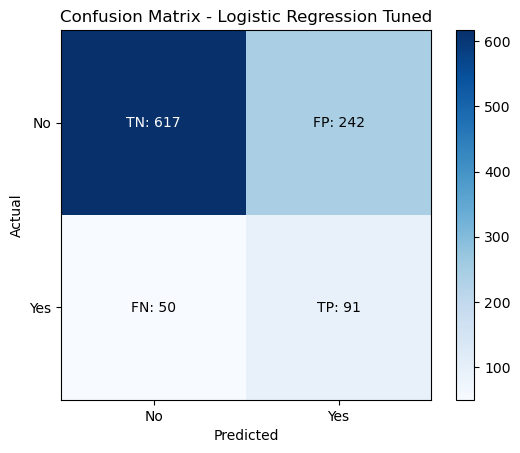

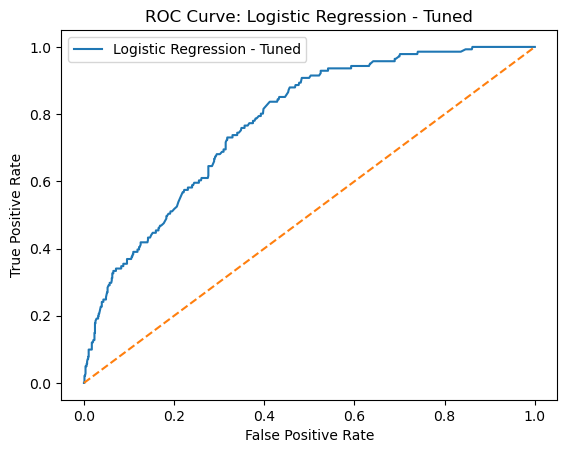

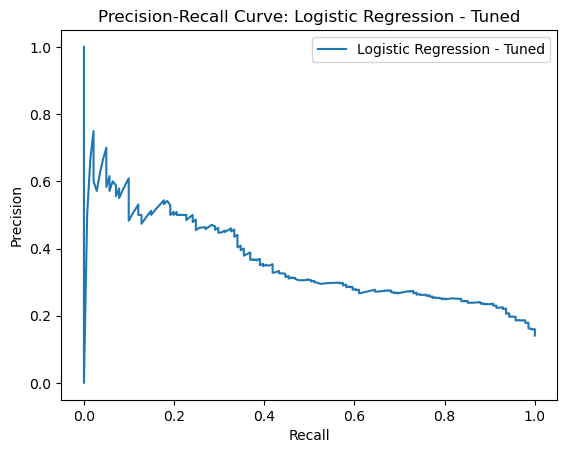

In [39]:
# Hyperparameter Tuning for Logistic Regression

from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=5000, class_weight=class_weights, random_state=RANDOM_STATE)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search_lr = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_lr.fit(X_train_scaled, y_train)
best_model_lr = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_
print(f"\nBest parameters for Logistic Regression: {best_params_lr}")
print(f"Best cross-validation F1-score: {grid_search_lr.best_score_:.3f}")

# Evaluate tuned Logistic Regression
metrics_lr_tuned, y_pred_lr_tuned, y_scores_lr_tuned = fit_and_scores(best_model_lr, 
                                                                      X_train_scaled, y_train, 
                                                                      X_test_scaled, y_test, "Logistic Regression - Tuned")
print(f"Tuned Logistic Regression - Metrics: {metrics_lr_tuned}")
plot_confusion(y_test, y_pred_lr_tuned, "Confusion Matrix - Logistic Regression Tuned")
plot_roc_pr_curves(y_test, y_scores_lr_tuned, "Logistic Regression - Tuned")
diabetes_results.append({
    'name': "Logistic Regression - Tuned",
    'model': best_model_lr,
    'accuracy': metrics_lr_tuned['accuracy'],
    'precision': metrics_lr_tuned['precision'],
    'recall': metrics_lr_tuned['recall'],
    'f1': metrics_lr_tuned['f1'],
    'roc_auc': metrics_lr_tuned['roc_auc'],
    'params': best_params_lr,
    'y_scores': y_scores_lr_tuned
})

#### Support Vector Machine (RBF)


Untuned SVM (RBF) - Metrics: {'model': 'SVM (RBF)', 'accuracy': 0.735, 'precision': 0.27037037037037037, 'recall': 0.5177304964539007, 'f1': 0.35523114355231145, 'roc_auc': 0.7434135024232367}


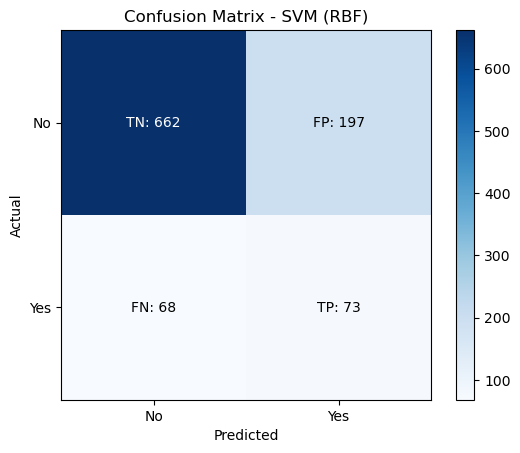

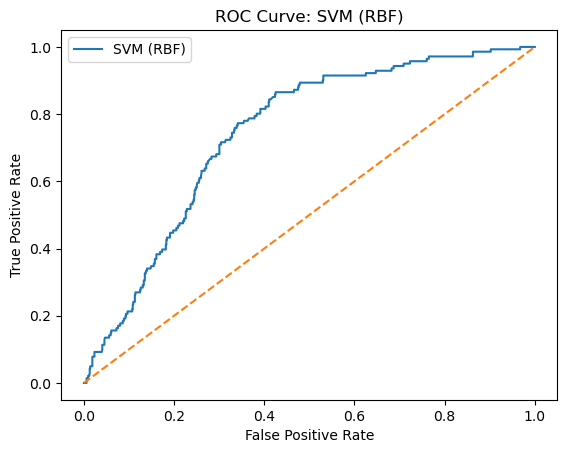

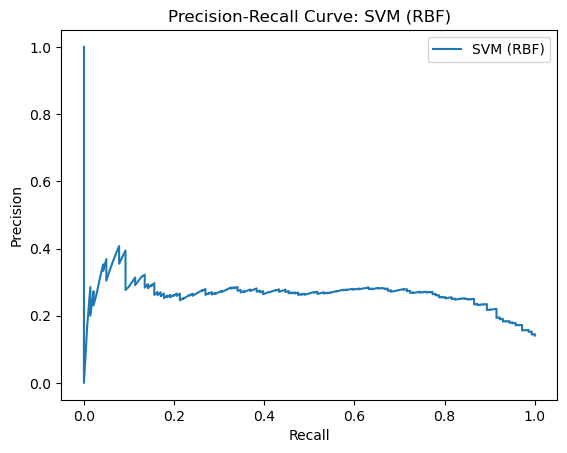

In [44]:
from sklearn.svm import SVC 

# SVM (RBF) 
svm_rbf = SVC(kernel='rbf', probability=True, cache_size=2000, class_weight=class_weights, random_state=RANDOM_STATE)
metrics_rbf, y_pred_rbf, y_scores_rbf = fit_and_scores(svm_rbf, X_train_scaled, y_train, X_test_scaled, y_test, "SVM (RBF)")
print(f"\nUntuned SVM (RBF) - Metrics: {metrics_rbf}")
plot_confusion(y_test, y_pred_rbf, "Confusion Matrix - SVM (RBF)")
plot_roc_pr_curves(y_test, y_scores_rbf, "SVM (RBF)")
diabetes_results.append({
    'name': "SVM (RBF)",
    'model': svm_rbf,
    'accuracy': metrics_rbf['accuracy'],
    'precision': metrics_rbf['precision'],
    'recall': metrics_rbf['recall'],
    'f1': metrics_rbf['f1'],
    'roc_auc': metrics_rbf['roc_auc'],
    'params': {'C': svm_rbf.C, 'gamma': svm_rbf.gamma},
    'y_scores': y_scores_rbf
})

In [103]:
# run cross validation for SVM (RBF)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_rbf, X_encoded_df, y, cv=5) # cv=5 for 5-fold cross-validation
print(f"Cross-validation scores, SVM (RBF): {scores}")
print(f"Mean accuracy: {np.mean(scores):.2f}")
print(f"Standard deviation of accuracy: {np.std(scores):.3f}")

Cross-validation scores, SVM (RBF): [0.736 0.718 0.744 0.707 0.704]
Mean accuracy: 0.72
Standard deviation of accuracy: 0.016


#### Support Vector Machine (RBF) Tuned

Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best parameters for SVM (RBF): {'C': 1, 'gamma': 0.001}
Best cross-validation F1-score: 0.424
Tuned SVM (RBF) - Metrics: {'model': 'SVM (RBF) - Tuned', 'accuracy': 0.699, 'precision': 0.2752808988764045, 'recall': 0.6950354609929078, 'f1': 0.39436619718309857, 'roc_auc': 0.7837374813200242}


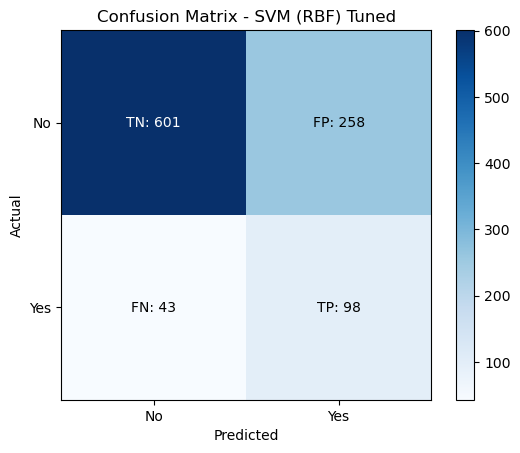

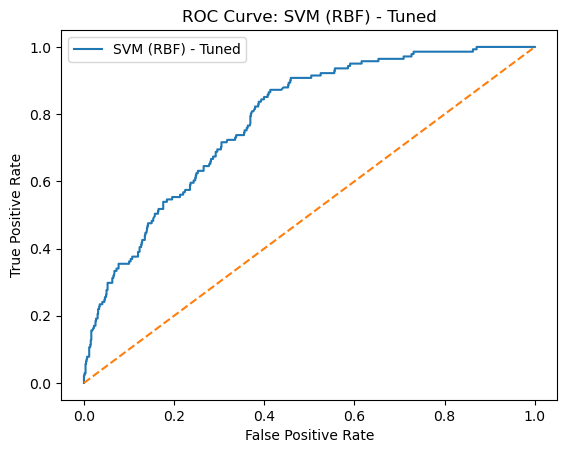

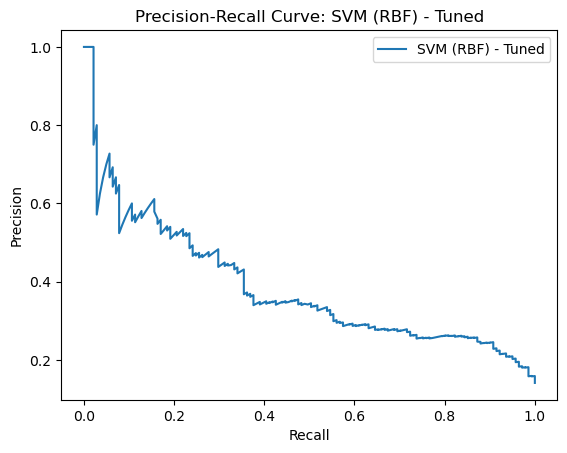

In [46]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning for SVM (RBF)
svm_rbf = SVC(kernel='rbf', probability=True, cache_size=2000, class_weight=class_weights, random_state=RANDOM_STATE)
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
}
grid_search_rbf = GridSearchCV(
    estimator=svm_rbf,
    param_grid=param_grid_rbf,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_rbf.fit(X_train_scaled, y_train)
best_model_rbf = grid_search_rbf.best_estimator_
best_params_rbf = grid_search_rbf.best_params_
print(f"\nBest parameters for SVM (RBF): {best_params_rbf}")
print(f"Best cross-validation F1-score: {grid_search_rbf.best_score_:.3f}")

# Evaluate tuned SVM (RBF)
metrics_rbf_tuned, y_pred_rbf_tuned, y_scores_rbf_tuned = fit_and_scores(best_model_rbf, 
                                                                         X_train_scaled, y_train, 
                                                                         X_test_scaled, y_test, "SVM (RBF) - Tuned")
print(f"Tuned SVM (RBF) - Metrics: {metrics_rbf_tuned}")
plot_confusion(y_test, y_pred_rbf_tuned, "Confusion Matrix - SVM (RBF) Tuned")
plot_roc_pr_curves(y_test, y_scores_rbf_tuned, "SVM (RBF) - Tuned")
diabetes_results.append({
    'name': "SVM (RBF) - Tuned",
    'model': best_model_rbf,
    'accuracy': metrics_rbf_tuned['accuracy'],
    'precision': metrics_rbf_tuned['precision'],
    'recall': metrics_rbf_tuned['recall'],
    'f1': metrics_rbf_tuned['f1'],
    'roc_auc': metrics_rbf_tuned['roc_auc'],
    'params': best_params_rbf,
    'y_scores': y_scores_rbf_tuned
})

#### Support Vector Machine (Linear)


Untuned SVM (Linear) - Metrics: {'model': 'SVM (Linear)', 'accuracy': 0.712, 'precision': 0.28695652173913044, 'recall': 0.7021276595744681, 'f1': 0.4074074074074074, 'roc_auc': 0.788616979994881}


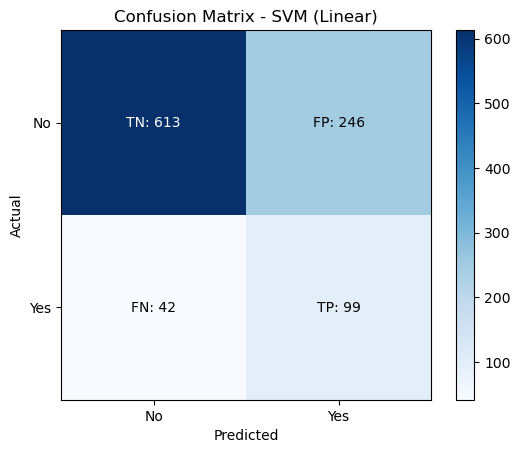

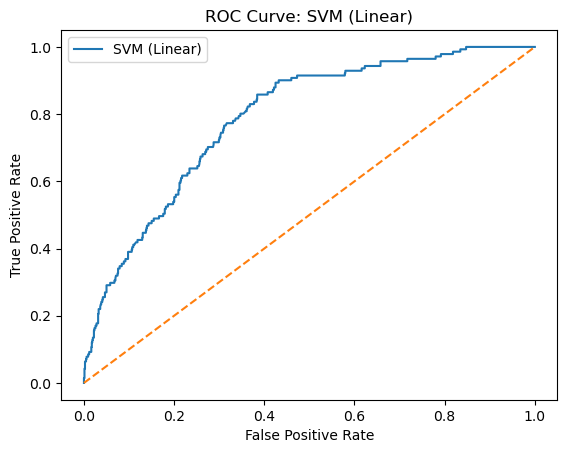

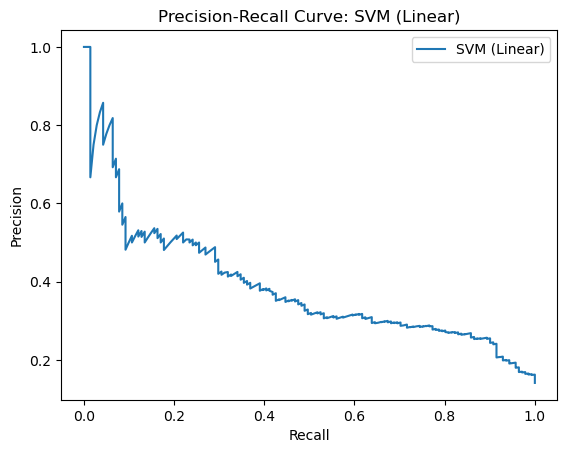

In [51]:
#  SVM (Linear) 
svm_linear = SVC(kernel='linear', probability=True, cache_size=2000, class_weight=class_weights, random_state=RANDOM_STATE)
metrics_linear, y_pred_linear, y_scores_linear = fit_and_scores(svm_linear, X_train_scaled, y_train, X_test_scaled, y_test, "SVM (Linear)")
print(f"\nUntuned SVM (Linear) - Metrics: {metrics_linear}")
plot_confusion(y_test, y_pred_linear, "Confusion Matrix - SVM (Linear)")
plot_roc_pr_curves(y_test, y_scores_linear, "SVM (Linear)")
diabetes_results.append({
    'name': "SVM (Linear)",
    'model': svm_linear,
    'accuracy': metrics_linear['accuracy'],
    'precision': metrics_linear['precision'],
    'recall': metrics_linear['recall'],
    'f1': metrics_linear['f1'],
    'roc_auc': metrics_linear['roc_auc'],
    'params': {'C': svm_linear.C},
    'y_scores': y_scores_linear
})

In [48]:
# run cross validation for SVM (Linear)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_linear, X_encoded_df, y, cv=5) # cv=5 for 5-fold cross-validation
print(f"Cross-validation scores, SVM (Linear): {scores}")
print(f"Mean accuracy: {np.mean(scores):.2f}")
print(f"Standard deviation of accuracy: {np.std(scores):.3f}")

Cross-validation scores, SVM (Linear): [0.699 0.697 0.728 0.692 0.713]
Mean accuracy: 0.71
Standard deviation of accuracy: 0.013


Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best parameters for SVM (Linear): {'C': 0.01}
Best cross-validation F1-score: 0.413
Tuned SVM (Linear) - Metrics: {'model': 'SVM (Linear) - Tuned', 'accuracy': 0.718, 'precision': 0.2920353982300885, 'recall': 0.7021276595744681, 'f1': 0.4125, 'roc_auc': 0.7857520289962763}


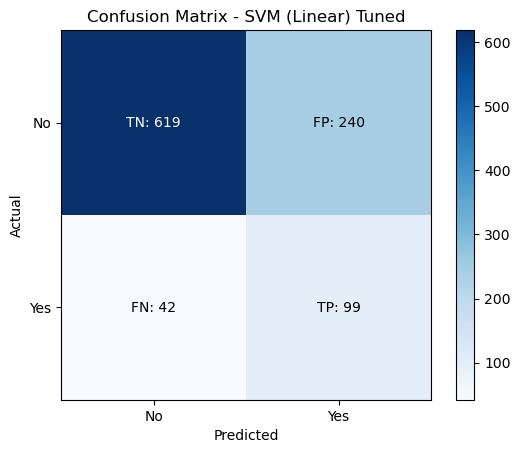

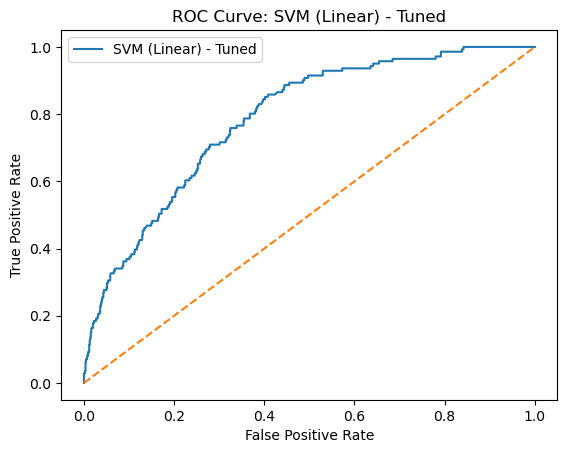

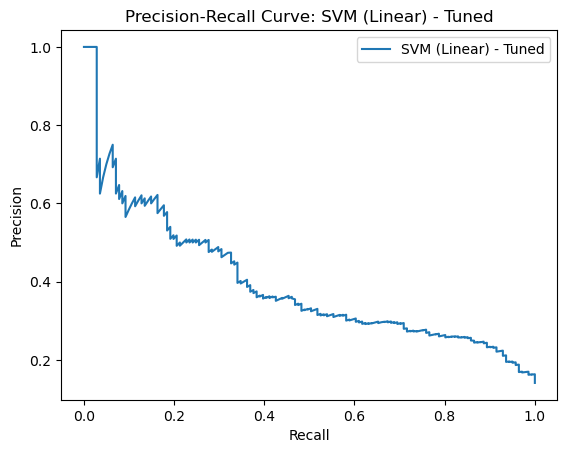

In [53]:
# --- Hyperparameter Tuning for SVM (Linear) ---
svm_linear = SVC(kernel='linear', probability=True, cache_size=2000, class_weight=class_weights, random_state=RANDOM_STATE)
param_grid_linear = {
    'C': [0.01, 0.1, 1]
}
grid_search_linear = GridSearchCV(
    estimator=svm_linear,
    param_grid=param_grid_linear,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_linear.fit(X_train_scaled, y_train)
best_model_linear = grid_search_linear.best_estimator_
best_params_linear = grid_search_linear.best_params_
print(f"\nBest parameters for SVM (Linear): {best_params_linear}")
print(f"Best cross-validation F1-score: {grid_search_linear.best_score_:.3f}")

# Evaluate tuned SVM (Linear)
metrics_linear_tuned, y_pred_linear_tuned, y_scores_linear_tuned = fit_and_scores(best_model_linear, 
                                                                                  X_train_scaled, y_train, 
                                                                                  X_test_scaled, y_test, "SVM (Linear) - Tuned")
print(f"Tuned SVM (Linear) - Metrics: {metrics_linear_tuned}")
plot_confusion(y_test, y_pred_linear_tuned, "Confusion Matrix - SVM (Linear) Tuned")
plot_roc_pr_curves(y_test, y_scores_linear_tuned, "SVM (Linear) - Tuned")
diabetes_results.append({
    'name': "SVM (Linear) - Tuned",
    'model': best_model_linear,
    'accuracy': metrics_linear_tuned['accuracy'],
    'precision': metrics_linear_tuned['precision'],
    'recall': metrics_linear_tuned['recall'],
    'f1': metrics_linear_tuned['f1'],
    'roc_auc': metrics_linear_tuned['roc_auc'],
    'params': best_params_linear,
    'y_scores': y_scores_linear_tuned
})

### Comparison of Results

In [54]:
# Display results list without y_scores and model
results_df = pd.DataFrame([
    {key: result[key] for key in ['name', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'params']}
    for result in diabetes_results
]).sort_values(by=['f1', 'roc_auc'], ascending=False)
cols_to_highlight = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
styled = results_df.style.highlight_max(subset=cols_to_highlight, axis=0, color='lightgreen')
display(styled)

,name,accuracy,precision,recall,f1,roc_auc,params
5,SVM (Linear) - Tuned,0.718000,0.292035,0.702128,0.412500,0.785752,{'C': 0.01}
4,SVM (Linear),0.712000,0.286957,0.702128,0.407407,0.788617,{'C': 1.0}
0,Logistic Regression,0.720000,0.286154,0.659574,0.399142,0.781995,{'C': 1.0}
3,SVM (RBF) - Tuned,0.699000,0.275281,0.695035,0.394366,0.783737,"{'C': 1, 'gamma': 0.001}"
1,Logistic Regression - Tuned,0.708000,0.273273,0.645390,0.383966,0.776026,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}"
2,SVM (RBF),0.735000,0.270370,0.517730,0.355231,0.743414,"{'C': 1.0, 'gamma': 'scale'}"


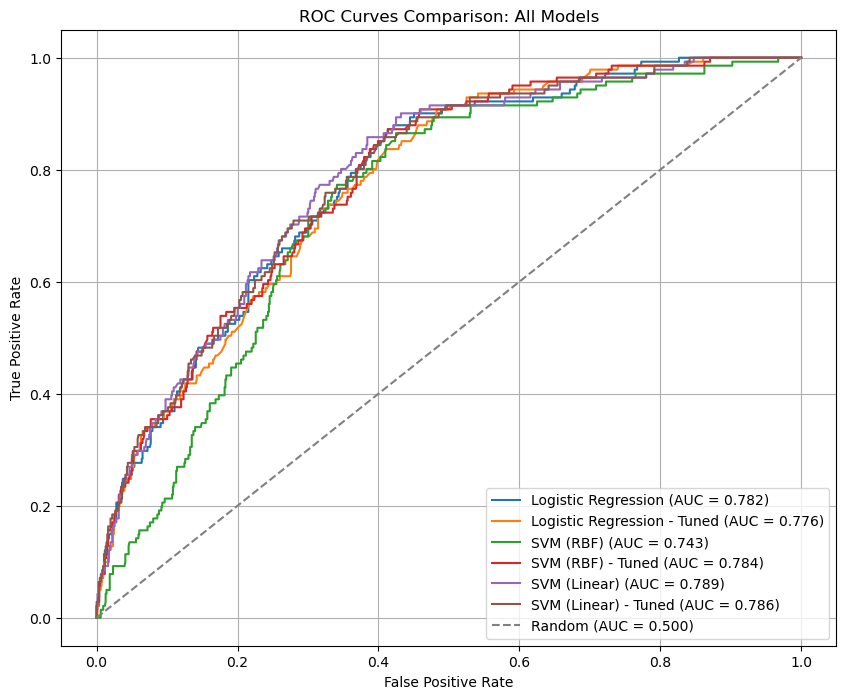

In [55]:
# Display consolidated ROC Curve visualization
def plot_roc_pr_curves(models_scores, y_true, title="ROC Curves Comparison"):
    plt.figure(figsize=(10, 8))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
    for (name, y_scores), color in zip(models_scores.items(), colors):
        if y_scores is None:
            print(f"{name}: No probability/decision scores available.")
            continue
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = roc_auc_score(y_true, y_scores)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', color=color)
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Random (AUC = 0.500)')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Collect scores from your existing diabetes_results
models_scores = {
    result['name']: result['y_scores']
    for result in diabetes_results
    if 'y_scores' in result
}

# Plot consolidated ROC curves
plot_roc_pr_curves(models_scores, y_test, "ROC Curves Comparison: All Models")

#### Feature coefficients for best model, SVM (Linear) - Tuned


SVM (Linear) - Tuned Feature Coefficients:
             Feature  Coefficient
     AGE_recoded_4.0     0.657259
 GENHLTH_recoded_3.0     0.637642
     AGE_recoded_3.0     0.618070
 GENHLTH_recoded_2.0     0.598218
       BMI_recoded_3     0.324424
       BMI_recoded_2     0.173558
  EMPLOY_recoded_2.0     0.143412
  EMPLOY_recoded_4.0     0.096001
        CVDCRHD4_2.0    -0.080816
  EMPLOY_recoded_3.0     0.053080
  INCOME_recoded_2.0     0.019895
DRVISITS_recoded_2_4     0.018706
     AGE_recoded_2.0     0.015820
  INCOME_recoded_5.0    -0.015200
DRVISITS_recoded_2_2     0.013696
        CHCKIDNY_2.0    -0.012309
   MENTHLTH_recode_1    -0.010646
         _EDUCAG_4.0     0.010086
            DECIDE_2    -0.009383
  INCOME_recoded_4.0    -0.008727
DRVISITS_recoded_2_3     0.007981
  INCOME_recoded_3.0     0.006693
         _EDUCAG_2.0    -0.006485
   MENTHLTH_recode_2    -0.005348
   MENTHLTH_recode_3    -0.003060
         _EDUCAG_3.0     0.001423
        EXERANY2_2.0     0.000107

Coe

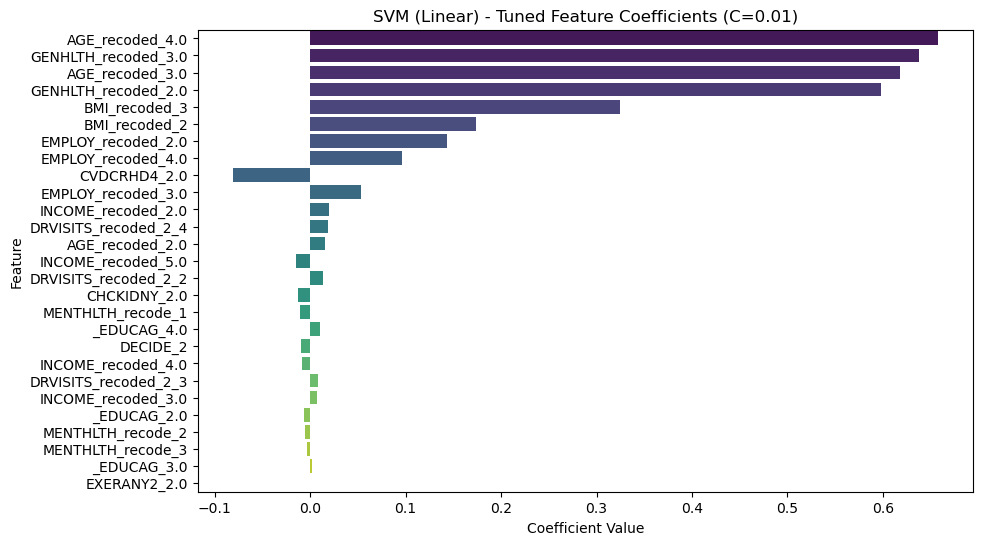

In [60]:

# Get coefficients and feature names for SVM (Linear) - Tuned
coefficients = best_model_linear.coef_[0]  # For binary classification
feature_names = X_encoded_df.columns

# Create a DataFrame for visualization and output
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient magnitude for better visualization
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Output coefficient values
print("\nSVM (Linear) - Tuned Feature Coefficients:")
print(coef_df.to_string(index=False))  # Print all coefficients
# Save to CSV for reference
coef_df.to_csv('svm_linear_coefficients.csv', index=False)
print("\nCoefficients saved to 'svm_linear_coefficients.csv'")

# Visualize coefficient impact with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', hue='Feature', data=coef_df, palette='viridis', legend=False)
plt.title('SVM (Linear) - Tuned Feature Coefficients (C=0.01)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [65]:
from sklearn.model_selection import cross_val_score
svm_linear = SVC(kernel='linear', C=0.01, probability=True, class_weight=class_weights, random_state=42)
f1_scores = cross_val_score(svm_linear, X_encoded_df_reduced, y, scoring='f1', cv=5)
print("Cross-validated F1 scores:", f1_scores, "Mean:", f1_scores.mean())

Cross-validated F1 scores: [0.40412371 0.41015625 0.46122449 0.42857143 0.42084168] Mean: 0.42498351261485734


#### Run best model, SVM (Linear) - Tuned with reduced feature set. Remove features with absolute coefficient values < 0.05.

In [67]:
# Run SVM (Linear) - Tuned after emoving features with absolute coefficient values < 0.05.

# Fit_and_scores function (unchanged)
def fit_and_scores(model, X_train, y_train, X_test, y_test, name="model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_scores = None
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    metrics = {
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_scores) if y_scores is not None else np.nan
    }
    return metrics, y_pred, y_scores

# Define reduced feature set
keep_features = [
    'AGE_recoded_4.0', 'AGE_recoded_3.0', 'AGE_recoded_2.0',
    'GENHLTH_recoded_3.0', 'GENHLTH_recoded_2.0',
    'BMI_recoded_3', 'BMI_recoded_2',
    'EMPLOY_recoded_2.0', 'EMPLOY_recoded_4.0', 'EMPLOY_recoded_3.0',
    'CVDCRHD4_2.0', 'CHCKIDNY_2.0'
]
X_encoded_df_reduced = X_encoded_df[keep_features]

# Preprocessing with reduced feature set
RANDOM_STATE = 42
y = BFRSS2014_df['DIABETE3_binary']
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df_reduced, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
class_counts = y.value_counts()
class_weights = {0: 1.0, 1: class_counts[0] / class_counts[1]}
print("\nClass Weights:", class_weights)
print("\nTrain Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)

# Scale features (retained since it improved Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-evaluate SVM (Linear) - Tuned
svm_linear_tuned = SVC(kernel='linear', C=0.01, probability=True, cache_size=2000, 
                       class_weight=class_weights, random_state=RANDOM_STATE)
metrics_linear_tuned, y_pred_linear_tuned, y_scores_linear_tuned = fit_and_scores(
    svm_linear_tuned, X_train_scaled, y_train, X_test_scaled, y_test, "SVM (Linear) - Tuned"
)

# Display new results
print("\nSVM (Linear) - Tuned (Reduced Features) Metrics:")
new_results = {
    'name': "SVM (Linear) - Tuned",
    'accuracy': metrics_linear_tuned['accuracy'],
    'precision': metrics_linear_tuned['precision'],
    'recall': metrics_linear_tuned['recall'],
    'f1': metrics_linear_tuned['f1'],
    'roc_auc': metrics_linear_tuned['roc_auc'],
    'params': {'C': 0.01}
}
print(pd.DataFrame([new_results]).to_string(index=False))

# Compare to original results
original_results = {
    'name': "SVM (Linear) - Tuned (Original Features)",
    'accuracy': 0.718000,
    'precision': 0.292035,
    'recall': 0.702128,
    'f1': 0.412500,
    'roc_auc': 0.785752,
    'params': {'C': 0.01}
}
print("\nOriginal SVM (Linear) - Tuned Metrics:")
print(pd.DataFrame([original_results]).to_string(index=False))

# Comparison
print("\nComparison:")
print(f"F1: Original = {original_results['f1']:.4f}, Reduced = {new_results['f1']:.4f}, "
      f"Change = {new_results['f1'] - original_results['f1']:.4f}")
print(f"Recall: Original = {original_results['recall']:.4f}, Reduced = {new_results['recall']:.4f}, "
      f"Change = {new_results['recall'] - original_results['recall']:.4f}")
print(f"ROC-AUC: Original = {original_results['roc_auc']:.4f}, Reduced = {new_results['roc_auc']:.4f}, "
      f"Change = {new_results['roc_auc'] - original_results['roc_auc']:.4f}")


Class Weights: {0: 1.0, 1: 6.112375533428165}

Train Shape: (4000, 12) (4000,)
Test Shape: (1000, 12) (1000,)

SVM (Linear) - Tuned (Reduced Features) Metrics:
                name  accuracy  precision   recall       f1  roc_auc      params
SVM (Linear) - Tuned     0.714    0.28739 0.695035 0.406639 0.784518 {'C': 0.01}

Original SVM (Linear) - Tuned Metrics:
                                    name  accuracy  precision   recall     f1  roc_auc      params
SVM (Linear) - Tuned (Original Features)     0.718   0.292035 0.702128 0.4125 0.785752 {'C': 0.01}

Comparison:
F1: Original = 0.4125, Reduced = 0.4066, Change = -0.0059
Recall: Original = 0.7021, Reduced = 0.6950, Change = -0.0071
ROC-AUC: Original = 0.7858, Reduced = 0.7845, Change = -0.0012


#### Run best model, SVM (Linear) - Tuned with less aggressive reduced feature set. Remove features with absolute coefficient values < 0.01.

In [68]:
# Run SVM (Linear) - Tuned with less agressive reduced feature set. (removing only features with absolute coefficient values < 0.01)
keep_features = [
    'AGE_recoded_4.0', 'AGE_recoded_3.0', 'AGE_recoded_2.0',
    'GENHLTH_recoded_3.0', 'GENHLTH_recoded_2.0',
    'BMI_recoded_3', 'BMI_recoded_2',
    'EMPLOY_recoded_2.0', 'EMPLOY_recoded_4.0', 'EMPLOY_recoded_3.0',
    'CVDCRHD4_2.0', '_EDUCAG_4.0', 'CHCKIDNY_2.0',
    'INCOME_recoded_2.0', 'DRVISITS_recoded_2_4', 'AGE_recoded_2.0',
    'INCOME_recoded_5.0', 'DRVISITS_recoded_2_2', 'CHCKIDNY_2.0',
    'MENTHLTH_recode_1', '_EDUCAG_4.0'
]
X_encoded_df_reduced = X_encoded_df[keep_features]
# Re-run the pipeline
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df_reduced, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_linear_tuned = SVC(kernel='linear', C=0.01, probability=True, cache_size=2000, 
                       class_weight=class_weights, random_state=42)
metrics_linear_tuned, _, _ = fit_and_scores(
    svm_linear_tuned, X_train_scaled, y_train, X_test_scaled, y_test, "SVM (Linear) - Tuned"
)
print("\nSVM (Linear) - Tuned (Less Aggressive Reduction) Metrics:")
print(pd.DataFrame([metrics_linear_tuned]).to_string(index=False))


SVM (Linear) - Tuned (Less Aggressive Reduction) Metrics:
               model  accuracy  precision   recall       f1  roc_auc
SVM (Linear) - Tuned     0.714    0.28739 0.695035 0.406639 0.785286


# <span style="color: red;">★</span> Begin Module 4

#### Reload data

In [2]:
BFRSS2014_df = pd.read_csv('my_data_3.csv')
X_encoded_df = pd.read_csv('x_encoded_df_2.csv')

In [3]:
X_encoded_df.shape

(5000, 27)

In [4]:
# Preprocessing (consistent with previous Modules)
RANDOM_STATE = 42
y = BFRSS2014_df['DIABETE3_binary']
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
class_counts = y.value_counts()
class_weights = {0: 1.0, 1: class_counts[0] / class_counts[1]}
print("\nClass Weights:", class_weights)
print("\nTrain Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)

# Scale features (consistent with previous)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Class Weights: {0: 1.0, 1: 6.112375533428165}

Train Shape: (4000, 27) (4000,)
Test Shape: (1000, 27) (1000,)


In [5]:
from sklearn.svm import SVC

# Re-evaluate SVM (Linear) - Tuned as baseline
svm_linear_tuned = SVC(kernel='linear', C=0.01, probability=True, cache_size=2000, 
                       class_weight=class_weights, random_state=RANDOM_STATE)
svm_linear_tuned.fit(X_train_scaled, y_train)
y_scores_svm = svm_linear_tuned.decision_function(X_test_scaled)
y_pred_svm = svm_linear_tuned.predict(X_test_scaled)
svm_metrics = {
    'name': "SVM (Linear) - Tuned",
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm, zero_division=0),
    'recall': recall_score(y_test, y_pred_svm),
    'f1': f1_score(y_test, y_pred_svm),
    'roc_auc': roc_auc_score(y_test, y_scores_svm)
}
print("\nSVM (Linear) - Tuned Metrics:", svm_metrics)


SVM (Linear) - Tuned Metrics: {'name': 'SVM (Linear) - Tuned', 'accuracy': 0.718, 'precision': 0.2920353982300885, 'recall': 0.7021276595744681, 'f1': 0.4125, 'roc_auc': 0.7857520289962763}


In [ ]:
!pip install tensorflow

#### Basic MLP Model

In [7]:
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC


# Model 1: Basic MLP

# Build the model
model1 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Explicit Input layer
    Dense(64, activation='relu'), 
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC(name='roc_auc')])

# Train the model
history1 = model1.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, 
                      class_weight=class_weights, verbose=1)

# Predict and evaluate
y_scores_model1 = model1.predict(X_test_scaled).flatten()
y_pred_model1 = (y_scores_model1 > 0.5).astype(int)
model1_metrics = {
    'name': "Basic MLP",
    'accuracy': accuracy_score(y_test, y_pred_model1),
    'precision': precision_score(y_test, y_pred_model1, zero_division=0),
    'recall': recall_score(y_test, y_pred_model1),
    'f1': f1_score(y_test, y_pred_model1),
    'roc_auc': roc_auc_score(y_test, y_scores_model1)
}
print("\nBasic MLP Metrics:", model1_metrics)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6075 - loss: 1.0713 - roc_auc: 0.7136 - val_accuracy: 0.7375 - val_loss: 0.5234 - val_roc_auc: 0.8079
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7091 - loss: 0.9403 - roc_auc: 0.8001 - val_accuracy: 0.7262 - val_loss: 0.5135 - val_roc_auc: 0.8199
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7169 - loss: 0.8885 - roc_auc: 0.8245 - val_accuracy: 0.7475 - val_loss: 0.4816 - val_roc_auc: 0.8209
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7416 - loss: 0.8572 - roc_auc: 0.8381 - val_accuracy: 0.7088 - val_loss: 0.5333 - val_roc_auc: 0.8227
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7369 - loss: 0.8298 - roc_auc: 0.8499 - val_accuracy: 0.7237 - val_loss: 0.5091 - val_roc_auc: 0.8211
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - loss: 0.8107 - roc_auc: 0.8574 - val_accuracy: 0.7362 - val_loss: 0.4964 - val_roc_auc:

In [22]:
print("\nBasic MLP Metrics:", model1_metrics)


Basic MLP Metrics: {'name': 'Basic MLP', 'accuracy': 0.777, 'precision': 0.2722222222222222, 'recall': 0.3475177304964539, 'f1': 0.3052959501557632, 'roc_auc': 0.7005135445305857}


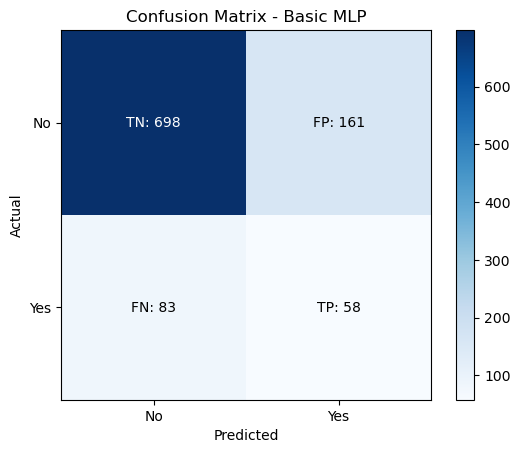

In [8]:
# Prepare confusion matrix for Basic MLP model
def plot_confusion(y_true, y_pred, title="Confusion Matrix", cmap='Blues'):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['No', 'Yes'])
    ax.set_yticklabels(['No', 'Yes'])
    labels = np.array([['TN', 'FP'], ['FN', 'TP']])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text_color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
            ax.text(j, i, f'{labels[i, j]}: {cm[i, j]}', ha="center", va="center", color=text_color)
    plt.colorbar(im)
    plt.show()

# Plot confusion matrix for Basic MLP
plot_confusion(y_test, y_pred_model1, "Confusion Matrix - Basic MLP")

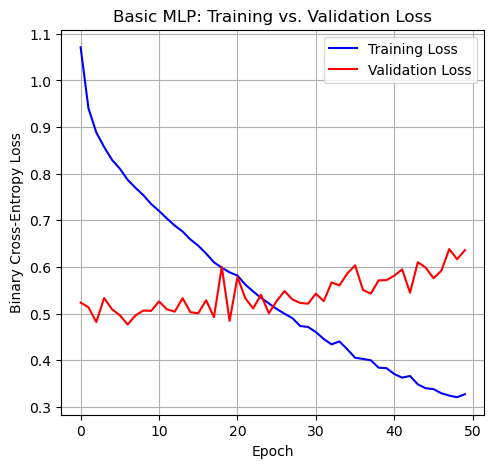

In [9]:
# Plot training and validation loss for Basic MLP model

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss', color='blue')
plt.plot(history1.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Basic MLP: Training vs. Validation Loss')
plt.legend()
plt.grid(True)

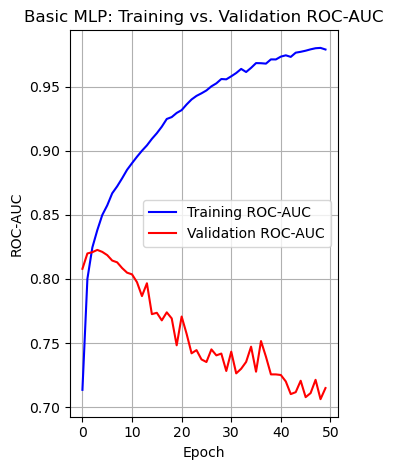

In [10]:
# Subplot 2: ROC-AUC 
plt.subplot(1, 2, 2)
plt.plot(history1.history['roc_auc'], label='Training ROC-AUC', color='blue')
plt.plot(history1.history['val_roc_auc'], label='Validation ROC-AUC', color='red')
plt.xlabel('Epoch')
plt.ylabel('ROC-AUC')
plt.title('Basic MLP: Training vs. Validation ROC-AUC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Advanced MLP Model with Dropout and Early Stopping

In [11]:
# Model 2: Advanced MLP with Dropout and Early Stopping
model2 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'), 
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC(name='roc_auc')])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history2 = model2.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, 
                      class_weight=class_weights, callbacks=[early_stopping], verbose=1)
y_scores_model2 = model2.predict(X_test_scaled).flatten()
y_pred_model2 = (y_scores_model2 > 0.5).astype(int)
model2_metrics = {
    'name': "Advanced MLP",
    'accuracy': accuracy_score(y_test, y_pred_model2),
    'precision': precision_score(y_test, y_pred_model2, zero_division=0),
    'recall': recall_score(y_test, y_pred_model2),
    'f1': f1_score(y_test, y_pred_model2),
    'roc_auc': roc_auc_score(y_test, y_scores_model2)
}
print("\nAdvanced MLP Metrics:", model2_metrics)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6153 - loss: 1.1201 - roc_auc: 0.6703 - val_accuracy: 0.6963 - val_loss: 0.5936 - val_roc_auc: 0.7989
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6988 - loss: 0.9984 - roc_auc: 0.7682 - val_accuracy: 0.6687 - val_loss: 0.5948 - val_roc_auc: 0.8116
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6956 - loss: 0.9504 - roc_auc: 0.7937 - val_accuracy: 0.7025 - val_loss: 0.5252 - val_roc_auc: 0.8201
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7128 - loss: 0.9042 - roc_auc: 0.8163 - val_accuracy: 0.6875 - val_loss: 0.5617 - val_roc_auc: 0.8263
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6909 - loss: 0.9023 - roc_auc: 0.8157 - val_accuracy: 0.7375 - val_loss: 0.4686 - val_roc_auc: 0.8254
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7197 - loss: 0.8827 - roc_auc: 0.8241 - val_accuracy: 0.7138 - val_loss: 0.4974 - val_ro

In [12]:
print("\nAdvanced MLP Metrics:", model2_metrics)


Advanced MLP Metrics: {'name': 'Advanced MLP', 'accuracy': 0.735, 'precision': 0.2987012987012987, 'recall': 0.6524822695035462, 'f1': 0.40979955456570155, 'roc_auc': 0.7577465137591954}


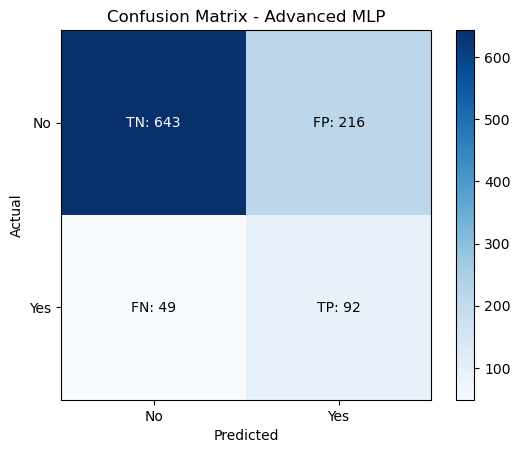

In [13]:
# Plot confusion matrix for Advanced MLP
plot_confusion(y_test, y_pred_model2, "Confusion Matrix - Advanced MLP")

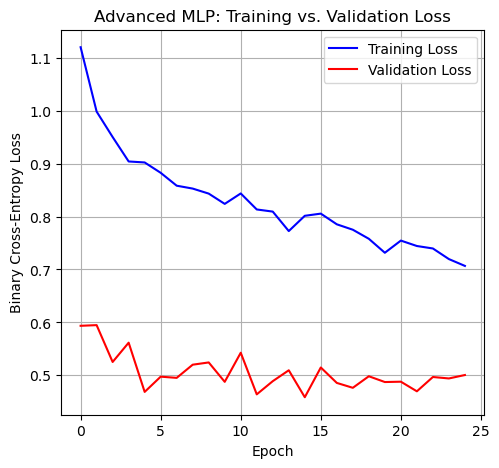

In [14]:
# Plot training and validation loss for Advnced MLP model

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss', color='blue')
plt.plot(history2.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Advanced MLP: Training vs. Validation Loss')
plt.legend()
plt.grid(True)

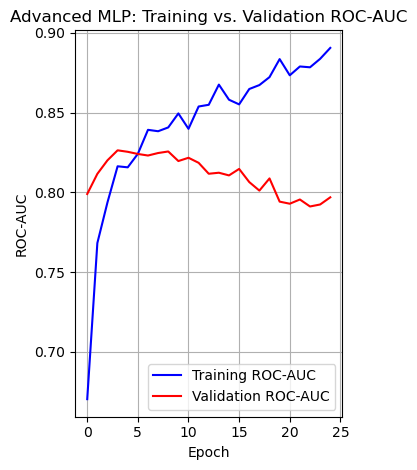

In [15]:
# Subplot 2: ROC-AUC for Advanced MLP model

plt.subplot(1, 2, 2)
plt.plot(history2.history['roc_auc'], label='Training ROC-AUC', color='blue')
plt.plot(history2.history['val_roc_auc'], label='Validation ROC-AUC', color='red')
plt.xlabel('Epoch')
plt.ylabel('ROC-AUC')
plt.title('Advanced MLP: Training vs. Validation ROC-AUC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Improved Advanced MLP with Adjusted Parameters

In [16]:
from tensorflow.keras.optimizers import Adam

# Model 2A: Improved Advanced MLP with adjusted parameters
model2A = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer='l2'),  # Reduced neurons, L2 regularization
    Dropout(0.4),  # Increased dropout
    Dense(32, activation='relu', kernel_regularizer='l2'),
    Dropout(0.4),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    Dense(1, activation='sigmoid')
])
model2A.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate
              loss='binary_crossentropy', 
              metrics=['accuracy', AUC(name='roc_auc')])

# Early stopping with reduced patience
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit with adjusted epochs and batch size
history2A = model2A.fit(X_train_scaled, y_train, epochs=30, batch_size=64, validation_split=0.2, 
                      class_weight=class_weights, callbacks=[early_stopping], verbose=1)

# Predict and evaluate
y_scores_model2A = model2A.predict(X_test_scaled).flatten()
y_pred_model2A = (y_scores_model2A > 0.5).astype(int)
model2A_metrics = {
    'name': "Improved Advanced MLP",
    'accuracy': accuracy_score(y_test, y_pred_model2A),
    'precision': precision_score(y_test, y_pred_model2A, zero_division=0),
    'recall': recall_score(y_test, y_pred_model2A),
    'f1': f1_score(y_test, y_pred_model2A),
    'roc_auc': roc_auc_score(y_test, y_scores_model2A)
}
print("\nImproved Advanced MLP Metrics:", model2A_metrics)

# Threshold adjustment to optimize recall
from sklearn.metrics import precision_recall_curve
prec, rec, thresholds = precision_recall_curve(y_test, y_scores_model2A)
target_recall = 0.7021  # Match SVM recall
idx = np.argmin(np.abs(rec - target_recall))
print(f"Threshold for recall ~0.7021: {thresholds[idx]:.4f}, Precision: {prec[idx]:.4f}")
y_pred_model2A_adjusted = (y_scores_model2A > thresholds[idx]).astype(int)
model2A_metrics_adjusted = {
    'name': "Improved Advanced MLP (Adjusted Threshold)",
    'accuracy': accuracy_score(y_test, y_pred_model2A_adjusted),
    'precision': prec[idx],
    'recall': rec[idx],
    'f1': f1_score(y_test, y_pred_model2A_adjusted),
    'roc_auc': roc_auc_score(y_test, y_scores_model2A)  # ROC-AUC unchanged
}
print("\nImproved Advanced MLP (Adjusted Threshold) Metrics:", model2A_metrics_adjusted)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3284 - loss: 2.4180 - roc_auc: 0.4821 - val_accuracy: 0.5263 - val_loss: 1.7223 - val_roc_auc: 0.5642
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3897 - loss: 2.3407 - roc_auc: 0.5134 - val_accuracy: 0.6225 - val_loss: 1.6637 - val_roc_auc: 0.6013
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4341 - loss: 2.2859 - roc_auc: 0.5324 - val_accuracy: 0.6712 - val_loss: 1.6233 - val_roc_auc: 0.6317
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4700 - loss: 2.2413 - roc_auc: 0.5426 - val_accuracy: 0.7300 - val_loss: 1.5956 - val_roc_auc: 0.6583
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4934 - loss: 2.2096 - roc_auc: 0.5606 - val_accuracy: 0.7500 - val_loss: 1.5772 - val_roc_auc: 0.6869
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5097 - loss: 2.1903 - roc_auc: 0.5703 - val_accuracy: 0.7738 - val_loss: 1.5580 - val_roc_auc: 0.7046
Epoc

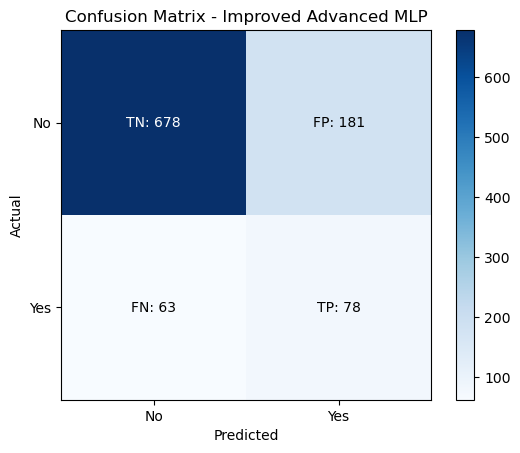

In [17]:
# Plot confusion matrix for Advanced MLP
plot_confusion(y_test, y_pred_model2A, "Confusion Matrix - Improved Advanced MLP")

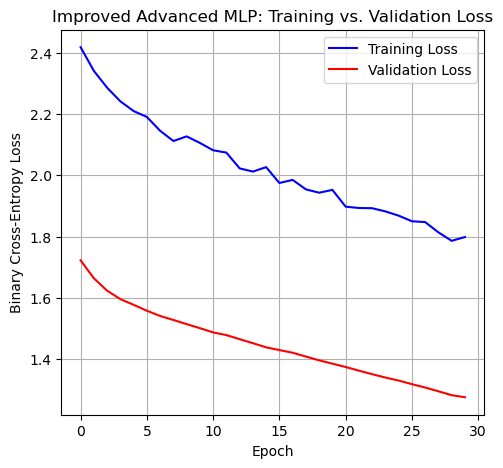

In [18]:
# Plot training and validation loss for Improved Advnced MLP model

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2A.history['loss'], label='Training Loss', color='blue')
plt.plot(history2A.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Improved Advanced MLP: Training vs. Validation Loss')
plt.legend()
plt.grid(True)

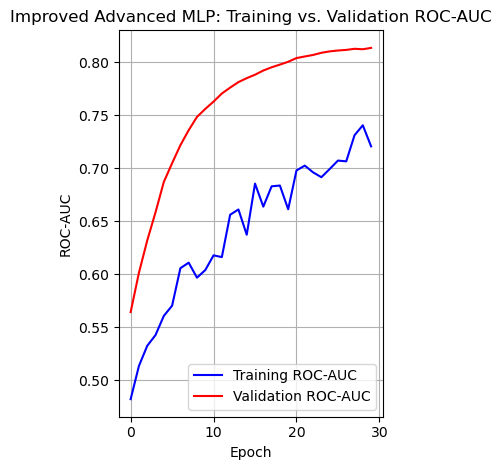

In [19]:
# Subplot 2: ROC-AUC for Improved Advanced MLP model

plt.subplot(1, 2, 2)
plt.plot(history2A.history['roc_auc'], label='Training ROC-AUC', color='blue')
plt.plot(history2A.history['val_roc_auc'], label='Validation ROC-AUC', color='red')
plt.xlabel('Epoch')
plt.ylabel('ROC-AUC')
plt.title('Improved Advanced MLP: Training vs. Validation ROC-AUC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Further Improved Advanced MLP

In [20]:
from tensorflow.keras.layers import BatchNormalization

# Adjusted class weights
adjusted_class_weights = {0: 1.0, 1: 7.0}  # Increased weight for positive class

# Model 2B: Further Improved Advanced MLP
model2B = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='relu', kernel_regularizer='l2'),
    Dense(1, activation='sigmoid')
])
model2B.compile(optimizer=Adam(learning_rate=0.0005),  # Increased learning rate
              loss='binary_crossentropy', 
              metrics=['accuracy', AUC(name='roc_auc')])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit with adjusted parameters
history2B = model2B.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2, 
                      class_weight=adjusted_class_weights, callbacks=[early_stopping], verbose=1)

# Predict and evaluate
y_scores_model2B = model2B.predict(X_test_scaled).flatten()
y_pred_model2B = (y_scores_model2B > 0.5).astype(int)
model2B_metrics = {
    'name': "Further Improved Advanced MLP",
    'accuracy': accuracy_score(y_test, y_pred_model2B),
    'precision': precision_score(y_test, y_pred_model2B, zero_division=0),
    'recall': recall_score(y_test, y_pred_model2B),
    'f1': f1_score(y_test, y_pred_model2B),
    'roc_auc': roc_auc_score(y_test, y_scores_model2B)
}
print("\nFurther Improved Advanced MLP Metrics:", model2B_metrics)

# Threshold adjustment to maximize F1 while keeping recall near 0.7021
prec, rec, thresholds = precision_recall_curve(y_test, y_scores_model2B)
f1_scores = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(prec, rec)]
idx = np.argmax(f1_scores)  # Maximize F1
if abs(rec[idx] - 0.7021) > 0.05:  # Ensure recall within 5% of 0.7021
    idx = np.argmin(np.abs(rec - 0.7021))
print(f"Optimal Threshold: {thresholds[idx]:.4f}, Precision: {prec[idx]:.4f}, Recall: {rec[idx]:.4f}, F1: {f1_scores[idx]:.4f}")
y_pred_model2B_adjusted = (y_scores_model2 > thresholds[idx]).astype(int)
model2B_metrics_adjusted = {
    'name': "Further Improved Advanced MLP (Adjusted Threshold)",
    'accuracy': accuracy_score(y_test, y_pred_model2B_adjusted),
    'precision': prec[idx],
    'recall': rec[idx],
    'f1': f1_score(y_test, y_pred_model2B_adjusted),
    'roc_auc': roc_auc_score(y_test, y_scores_model2B)  # ROC-AUC unchanged
}
print("\nFurther Improved Advanced MLP (Adjusted Threshold) Metrics:", model2B_metrics_adjusted)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3472 - loss: 2.1056 - roc_auc: 0.5077 - val_accuracy: 0.2763 - val_loss: 1.4368 - val_roc_auc: 0.6296
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3722 - loss: 2.0245 - roc_auc: 0.5057 - val_accuracy: 0.5025 - val_loss: 1.3147 - val_roc_auc: 0.6571
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4300 - loss: 1.9525 - roc_auc: 0.5524 - val_accuracy: 0.6187 - val_loss: 1.2490 - val_roc_auc: 0.6767
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4634 - loss: 1.8578 - roc_auc: 0.5919 - val_accuracy: 0.6762 - val_loss: 1.2117 - val_roc_auc: 0.6932
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4888 - loss: 1.8249 - roc_auc: 0.5979 - val_accuracy: 0.7188 - val_loss: 1.1771 - val_roc_auc: 0.6978
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 1.7824 - roc_auc: 0.6083 - val_accuracy: 0.7325 - val_loss: 1.1533 - val_roc_auc: 0.7071
Epoc

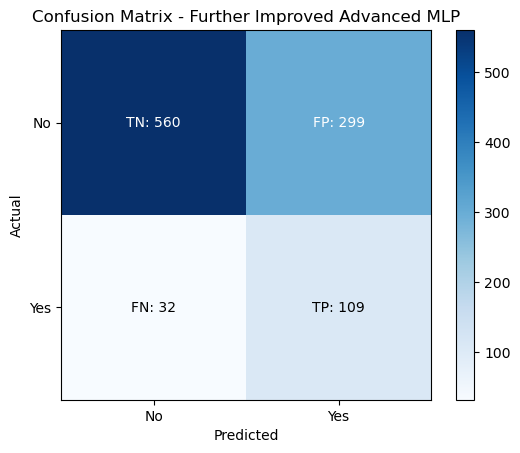

In [21]:
# Plot confusion matrix for Further Improved Advanced MLP
plot_confusion(y_test, y_pred_model2B, "Confusion Matrix - Further Improved Advanced MLP")

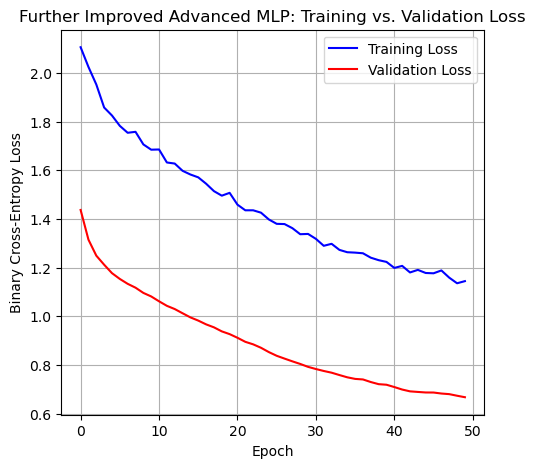

In [22]:
# Plot training and validation loss for Furter Improved Advnced MLP model

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2B.history['loss'], label='Training Loss', color='blue')
plt.plot(history2B.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Further Improved Advanced MLP: Training vs. Validation Loss')
plt.legend()
plt.grid(True)

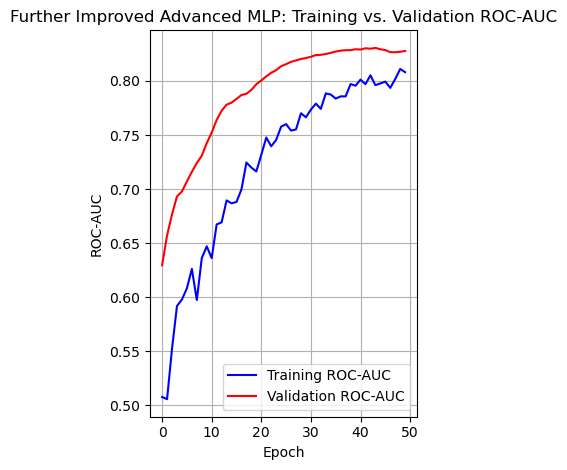

In [23]:
# Subplot 2: ROC-AUC for Further Improved Advanced MLP model

plt.subplot(1, 2, 2)
plt.plot(history2B.history['roc_auc'], label='Training ROC-AUC', color='blue')
plt.plot(history2B.history['val_roc_auc'], label='Validation ROC-AUC', color='red')
plt.xlabel('Epoch')
plt.ylabel('ROC-AUC')
plt.title('Further Improved Advanced MLP: Training vs. Validation ROC-AUC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Consolidated Comparison, SVM (Linear) - Tuned vs MLP Iterations

,name,accuracy,precision,recall,f1,roc_auc
0,SVM (Linear) - Tuned,0.718000,0.292035,0.702128,0.412500,0.785752
2,Advanced MLP,0.735000,0.298701,0.652482,0.409800,0.757747
4,Further Improved Advanced MLP,0.669000,0.267157,0.773050,0.397086,0.768364
3,Improved Advanced MLP,0.756000,0.301158,0.553191,0.390000,0.764674
1,Basic MLP,0.756000,0.264840,0.411348,0.322222,0.710586


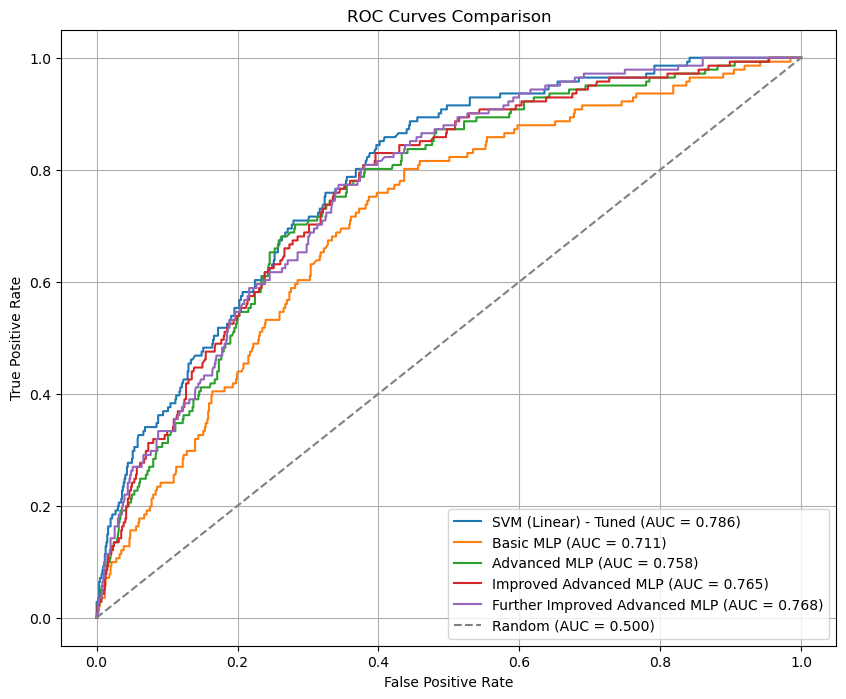

In [26]:
# Consolidated Comparison
results = [svm_metrics, model1_metrics, model2_metrics, model2A_metrics, model2B_metrics]
results_df = pd.DataFrame(results).sort_values(by=['f1', 'roc_auc'], ascending=False)
cols_to_highlight = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
styled = results_df.style.highlight_max(subset=cols_to_highlight, axis=0, color='lightgreen')
display(styled)

# Consolidated ROC Curve
models_scores = {
    'SVM (Linear) - Tuned': y_scores_svm,
    'Basic MLP': y_scores_model1,
    'Advanced MLP': y_scores_model2,
    'Improved Advanced MLP': y_scores_model2A,
    'Further Improved Advanced MLP': y_scores_model2B
}
plt.figure(figsize=(10, 8))
for name, y_scores in models_scores.items():
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_scores):.3f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random (AUC = 0.500)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid(True)
plt.show()

### Continued on Google Colab due to repeated kernal crashing with Neural Additive Models (NAM) on my MacBook.
#### See: ANA500_MP4_NAM_Colab.ipynb